# Compute gcorr diseases and phenotypes (ldscr)

Last modification: 

Page with the ldsr files:
https://nealelab.github.io/UKBB_ldsc/downloads.html#ldsc_sumstat_files

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob, os
from os import listdir
from os.path import isfile, join
from datetime import datetime

In [31]:

### Copied from config

MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
traits_phenos = list(MAIN_LABELS.split(","))
traits_phenos_new = list(MAIN_NAMES.split(","))

only_continuos = False #True # True
only_True_and_True_only = True 

path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/gcorr_diseases/'


### Read from csv
file_info_name='pheno_diseases_info.csv'

df_inf_csv = pd.read_csv(f'~/retina-phenotypes/complementary/{file_info_name}')
print('len(df_inf_csv):', len(df_inf_csv))

df_inf_filt =  df_inf_csv[df_inf_csv['lscr_analysis'] == 'TRUE']
print('len(df_inf_filt):', len(df_inf_filt))

if only_continuos:
    df_inf_filt =  df_inf_filt[(df_inf_filt['dtype'] == 'con') | (df_inf_filt['dtype'] == 'cat')]
    print('len(df_inf_filt):', len(df_inf_filt))
    df_inf_filt = df_inf_filt[df_inf_filt['name_LR'] != 'N_cigarettes_curr_daily_both']

#print(df_inf_filt['pascal_analysis'].value_counts())

if only_True_and_True_only:
    df_inf_filt = df_inf_filt[((df_inf_filt['pascal_analysis'] == 'TRUE') | (df_inf_filt['pascal_analysis'] == 'TRUE_only') | (df_inf_filt['pascal_analysis'] == 'TRUE_only_BUT_GENE_SCORING_INCOMPLETE') | (df_inf_filt['pascal_analysis'] == 'TRUE_BUT_GENE_SCORING_INCOMPLETE') | (df_inf_filt['pascal_analysis'] == 'included_NO_GENES')) & (df_inf_filt['lscr_analysis'] == 'TRUE')]
    print('len(df_inf_filt):', len(df_inf_filt))


traits_all = list(df_inf_filt['datafield'].values)
traits_all_new = list(df_inf_filt['final_name'].values)

len(df_inf_csv): 89
len(df_inf_filt): 18
len(df_inf_filt): 17


In [32]:
# path This we can read from config
def try_to_compute_all(traits_all):
    
    save_path = path
    l_diseases_all=[]
    for trait in traits_all:
        #print(trait)
        for file in os.listdir(path):
            #print(file, '\n')
            if file.startswith(trait):
                if (file.endswith('.tsv.bgz'))  or (file.endswith('.tsv')):
                    print('PHENO', trait)
                    print(file, '\n')
                    #df_ss = pd.read_csv(path + file,  nrows=1, sep='\t')
                    #print(df_ss['N'].iloc[0])
                    #print(file)
                    data={
                        'pheno':  trait,
                        'file':  file
                        #,'N': df_ss['N'].iloc[0],
                        }
                    l_diseases_all.append(data)

    df_diseases_all =pd.DataFrame(l_diseases_all)
    #file_name_end = '_irnt.gwas.imputed_v3.both_sexes.tsv'

    l_traits_file=[]
    for trait in traits_phenos:
        file_pheno = f'{trait}__munged.sumstats.gz'
        l_traits_file.append(file_pheno)

    traits_files = l_traits_file + list(df_diseases_all['file'])
    traits_names = traits_phenos + list(df_diseases_all['pheno'])
    print(len(traits_files), len(l_traits_file), len(list(df_diseases_all['file'])))
    return df_diseases_all

df_diseases_all = try_to_compute_all(traits_all)

PHENO 4079
4079_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 4080
4080_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 6150_4
6150_4.ldsc.imputed_v3.both_sexes.tsv 

PHENO 102
102_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 21021
21021_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 30760
30760_irnt.imputed_v3.ldsc.both_sexes.tsv 

PHENO 30780
30780_irnt.imputed_v3.ldsc.both_sexes.tsv 

PHENO 30870
30870_irnt.imputed_v3.ldsc.both_sexes.tsv 

PHENO 30750
30750_irnt.imputed_v3.ldsc.both_sexes.tsv 

PHENO 1558
1558.ldsc.imputed_v3.both_sexes.tsv 

PHENO 20116_0
20116_0.ldsc.imputed_v3.both_sexes.tsv 

PHENO 20116_2
20116_2.ldsc.imputed_v3.both_sexes.tsv 

PHENO 21001
21001_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 6148_4
6148_4.ldsc.imputed_v3.both_sexes.tsv 

PHENO 2443
2443.ldsc.imputed_v3.both_sexes.tsv 

PHENO 6150_2
6150_2.ldsc.imputed_v3.both_sexes.tsv 

PHENO 6150_1
6150_1.ldsc.imputed_v3.both_sexes.tsv 

34 17 17


In [33]:
#df_diseases_all= df_diseases_all.drop_duplicates(subset='pheno')
df_diseases_all

,pheno,file
0,4079,4079_irnt.ldsc.imputed_v3.both_sexes.tsv
1,4080,4080_irnt.ldsc.imputed_v3.both_sexes.tsv
2,6150_4,6150_4.ldsc.imputed_v3.both_sexes.tsv
3,102,102_irnt.ldsc.imputed_v3.both_sexes.tsv
4,21021,21021_irnt.ldsc.imputed_v3.both_sexes.tsv
5,30760,30760_irnt.imputed_v3.ldsc.both_sexes.tsv
6,30780,30780_irnt.imputed_v3.ldsc.both_sexes.tsv
7,30870,30870_irnt.imputed_v3.ldsc.both_sexes.tsv
8,30750,30750_irnt.imputed_v3.ldsc.both_sexes.tsv
9,1558,1558.ldsc.imputed_v3.both_sexes.tsv


In [34]:
#datafields_irnt = [ dat + "_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz" for dat in traits_reduced]
datafields_irnt = list(df_diseases_all['file'])
datafields_pheno = [f"{dat}__munged.sumstats.gz" for dat in traits_phenos]
diseasess_tra_aux = list(df_diseases_all['pheno'])

traits_col_index = traits_phenos + diseasess_tra_aux
traits_names = datafields_pheno + datafields_irnt


In [35]:
### IMPORTANT: If you have not same file go back to diseases_traits and comment 
### the phenotypes that are missing

In [36]:
# filter the files names containing 2 traits
def read_ldsr(traits_files, traits_col_index):
    df_cov=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    df_corr=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    df_std=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    df_pval=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    #2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_4700_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz.log
    #2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_D_A_std__munged.sumstats.gz.log

    for i  in range(len(traits_files)):
        for j in range(len(traits_files)):
            h2 = []
            file_both_name = traits_files[i]+'_'+ traits_files[j]+'.log'
            dir_traitsfile = path+file_both_name
            #print(dir_traitsfile)
            with open(dir_traitsfile) as fp:
                print(fp)
                print(traits_files[i],traits_files[j])
                Lines = fp.readlines()
                for line in Lines:
                    #print(line)
                    split = line.split()
                    if('gencov:' in split):
                        df_cov.iloc[i][j] = round(float(split[ split.index('gencov:') +1 ]),2)
                        df_cov.iloc[j][i] = round(float(split[ split.index('gencov:') +1 ]),2)
                        #print(split)
                    if('Correlation:' in split):
                        print(line)
                        #print(split)
                        df_corr.iloc[i][j] = round(float(split[ split.index('Correlation:') +1 ]),2)
                        df_corr.iloc[j][i] = round(float(split[ split.index('Correlation:') +1 ]),2)
                        #print(array2)
                        #print(split )
                        #print( df_corr.iloc[i][j], float(split[ split.index('Correlation:') +1 ]) )
                        #print( df_corr.iloc[j][i], float(split[ split.index('Correlation:') +1 ]))
                        df_std.iloc[i][j] = split[3]
                        df_std.iloc[j][i] = split[3]
                    if('P:' in split):
                        #print(line)
                        #print(split)
                        df_pval.iloc[i][j] = float(split[ split.index('P:') +1 ])
                        df_pval.iloc[j][i] = float(split[ split.index('P:') +1 ])

    return df_cov, df_corr, df_std, df_pval

df_cov, df_corr, df_std2, df_pval = read_ldsr(traits_names, traits_col_index)     



<_io.TextIOWrapper name='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/gcorr_diseases/mean_angle_taa__munged.sumstats.gz_mean_angle_taa__munged.sumstats.gz.log' mode='r' encoding='UTF-8'>
mean_angle_taa__munged.sumstats.gz mean_angle_taa__munged.sumstats.gz
Genetic Correlation: 1. (1.7526e-06)

<_io.TextIOWrapper name='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/gcorr_diseases/mean_angle_taa__munged.sumstats.gz_mean_angle_tva__munged.sumstats.gz.log' mode='r' encoding='UTF-8'>
mean_angle_taa__munged.sumstats.gz mean_angle_tva__munged.sumstats.gz
Genetic Correlation: 0.6574 (0.0699)

<_io.TextIOWrapper name='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/gcorr_diseases/mean_angle_taa__munged.sumstats.gz_tau1_vein__munged.sumstats.gz.log' mode='r' encoding='UTF-8'>
mean_angle_taa__munged.sumstats.gz tau1_vein__munged.sumstats.gz
Genetic Correlation: 0.0981 (0.0553)

<_io.TextIOWrapper name='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/

In [37]:
def rename_col_index(df, l_phenos_old, l_phenos_new, l_diseases_old, l_diseases_new):
      df.rename(columns=dict(zip(l_diseases_old, l_diseases_new)), inplace=True)
      df.rename(index=dict(zip(l_phenos_old, l_phenos_new)), inplace=True)
      return df

def detele_col_index(df, l_phenos_old, l_phenos_new, l_diseases_old, l_diseases_new):
      #print(l_phenos_old, l_phenos_new)
      df=df.drop(columns=l_phenos_old)
      #print(df.index)
      #print(l_diseases_old)
      #df=df.drop(index=l_diseases_old)
      df = df[df.index.isin(l_phenos_old)]
      #print(df)
      df= rename_col_index(df, l_phenos_old, l_phenos_new, l_diseases_old, l_diseases_new)    
      return df

df_corr_simpl = detele_col_index(df_corr, traits_phenos, traits_phenos_new, traits_all, traits_all_new)
df_std_simpl = detele_col_index(df_std2,  traits_phenos, traits_phenos_new, traits_all,  traits_all_new)
df_pval_simpl =  detele_col_index(df_pval,  traits_phenos, traits_phenos_new, traits_all,  traits_all_new)
#df_std_simpl =  df_std2 #.astype(float)
#df_corr_simpl = df_corr.astype(float)
    

In [38]:
#df_std_simpl.drop_duplicates(inplace=True)
df_std_simpl = df_std_simpl.loc[:,~df_std_simpl.columns.duplicated()].copy()
df_std_simpl.columns

Index(['DBP', 'SBP', 'Hypertension', 'PR', 'PWASI', 'HDL', 'LDL',
       'Triglycerides', 'HbA1c', 'Alcohol', 'Smoking status: Never',
       'Smoking status: Current', 'BMI', 'Cataract', 'Diabetes', 'Angina',
       'Heart attack'],
      dtype='object')

In [39]:
## Reorder

list_risk_order = ['DBP', 'SBP', 'PR', 'PWASI', 'HDL', 'LDL', 'Triglycerides',  'HbA1c', 'Alcohol','BMI'] #hardcoded to be in order
list_binary_order = ['Hypertension',
 'Smoking status: Never',
 'Smoking status: Current',
 #'Glasses myopia *',
 'Diabetes',
 'Angina',
 'Heart attack',
 #'Glaucoma *',
 'Cataract']
 
list_column_name = list_risk_order + list_binary_order

df_std_simpl = df_std_simpl[list_column_name]
df_corr_simpl = df_corr_simpl[list_column_name]
df_corr_simpl = df_corr_simpl[list_column_name]



In [40]:
#df_std_simpl = df_std_simpl.astype(str)
for col in df_std_simpl.columns:
    #print(col)
    #print(df_std_simpl[col].head(3))
    df_std_simpl[col] = df_std_simpl[col].str.replace("(", "", regex=True)
    df_std_simpl[col] = df_std_simpl[col].str.replace(")", "", regex=True)

df_std_simpl=df_std_simpl.astype(float)
df_std_simpl=df_std_simpl.round(2)
df_std_simpl.dtypes

DBP                        float64
SBP                        float64
PR                         float64
PWASI                      float64
HDL                        float64
LDL                        float64
Triglycerides              float64
HbA1c                      float64
Alcohol                    float64
BMI                        float64
Hypertension               float64
Smoking status: Never      float64
Smoking status: Current    float64
Diabetes                   float64
Angina                     float64
Heart attack               float64
Cataract                   float64
dtype: object

In [41]:
table_plot='False'

if table_plot=='True':
    #print(df_reducida.columns, df_std.columns)
    df = f'{df_corr_simpl.astype(str)} ({df_std_simpl.astype(str)})'

    df_corr_simpl_aux = df_corr_simpl.copy()
    df_corr_simpl_aux = df_corr_simpl_aux.astype(float)

    rcolors = plt.cm.Greys(np.full(len(df.index), 0.15))
    ccolors = plt.cm.Greys(np.full(len(df.columns), 0.15))
    fig, ax = plt.subplots()
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    #create table
    table = ax.table(cellText=df.values, 
                    #rowColours=rcolors,
                    colLabels=df.columns, 
                    rowLabels=df.index,
                    #colColours=ccolors,
                    rowLoc='center',
                    colLoc='center',
                    cellLoc='center',
                    cellColours=plt.cm.viridis(df_corr_simpl_aux.values, alpha=0.5),
                    loc='center',
                    fontsize=16,
                    colWidths=[0.15 for x in df.columns])


    table.auto_set_font_size(False)
    table.set_fontsize(16)
    table.scale(3.7, 3.5) # make table a little bit larger
    fig.tight_layout()
    #plt.show()
    #fig.savefig(save_dir+str(DATE)+'_'+'ventile'+str(ventile_num)+'_diseases_gcorr.pdf', bbox_inches='tight',dpi=250)


# Figure genetic correlation with diseases

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'A temporal angle'),
  Text(1.5, 0, 'V temporal angle'),
  Text(2.5, 0, 'V tortuosity'),
  Text(3.5, 0, 'A tortuosity'),
  Text(4.5, 0, 'ratio tortuosity'),
  Text(5.5, 0, 'A central retinal eq'),
  Text(6.5, 0, 'ratio central retinal eq'),
  Text(7.5, 0, 'A std diameter'),
  Text(8.5, 0, 'V std diameter'),
  Text(9.5, 0, 'V central retinal eq'),
  Text(10.5, 0, 'ratio vascular density'),
  Text(11.5, 0, 'A vascular density'),
  Text(12.5, 0, 'bifurcations'),
  Text(13.5, 0, 'V vascular density'),
  Text(14.5, 0, 'A median diameter'),
  Text(15.5, 0, 'V median diameter'),
  Text(16.5, 0, 'ratio median diameter')])

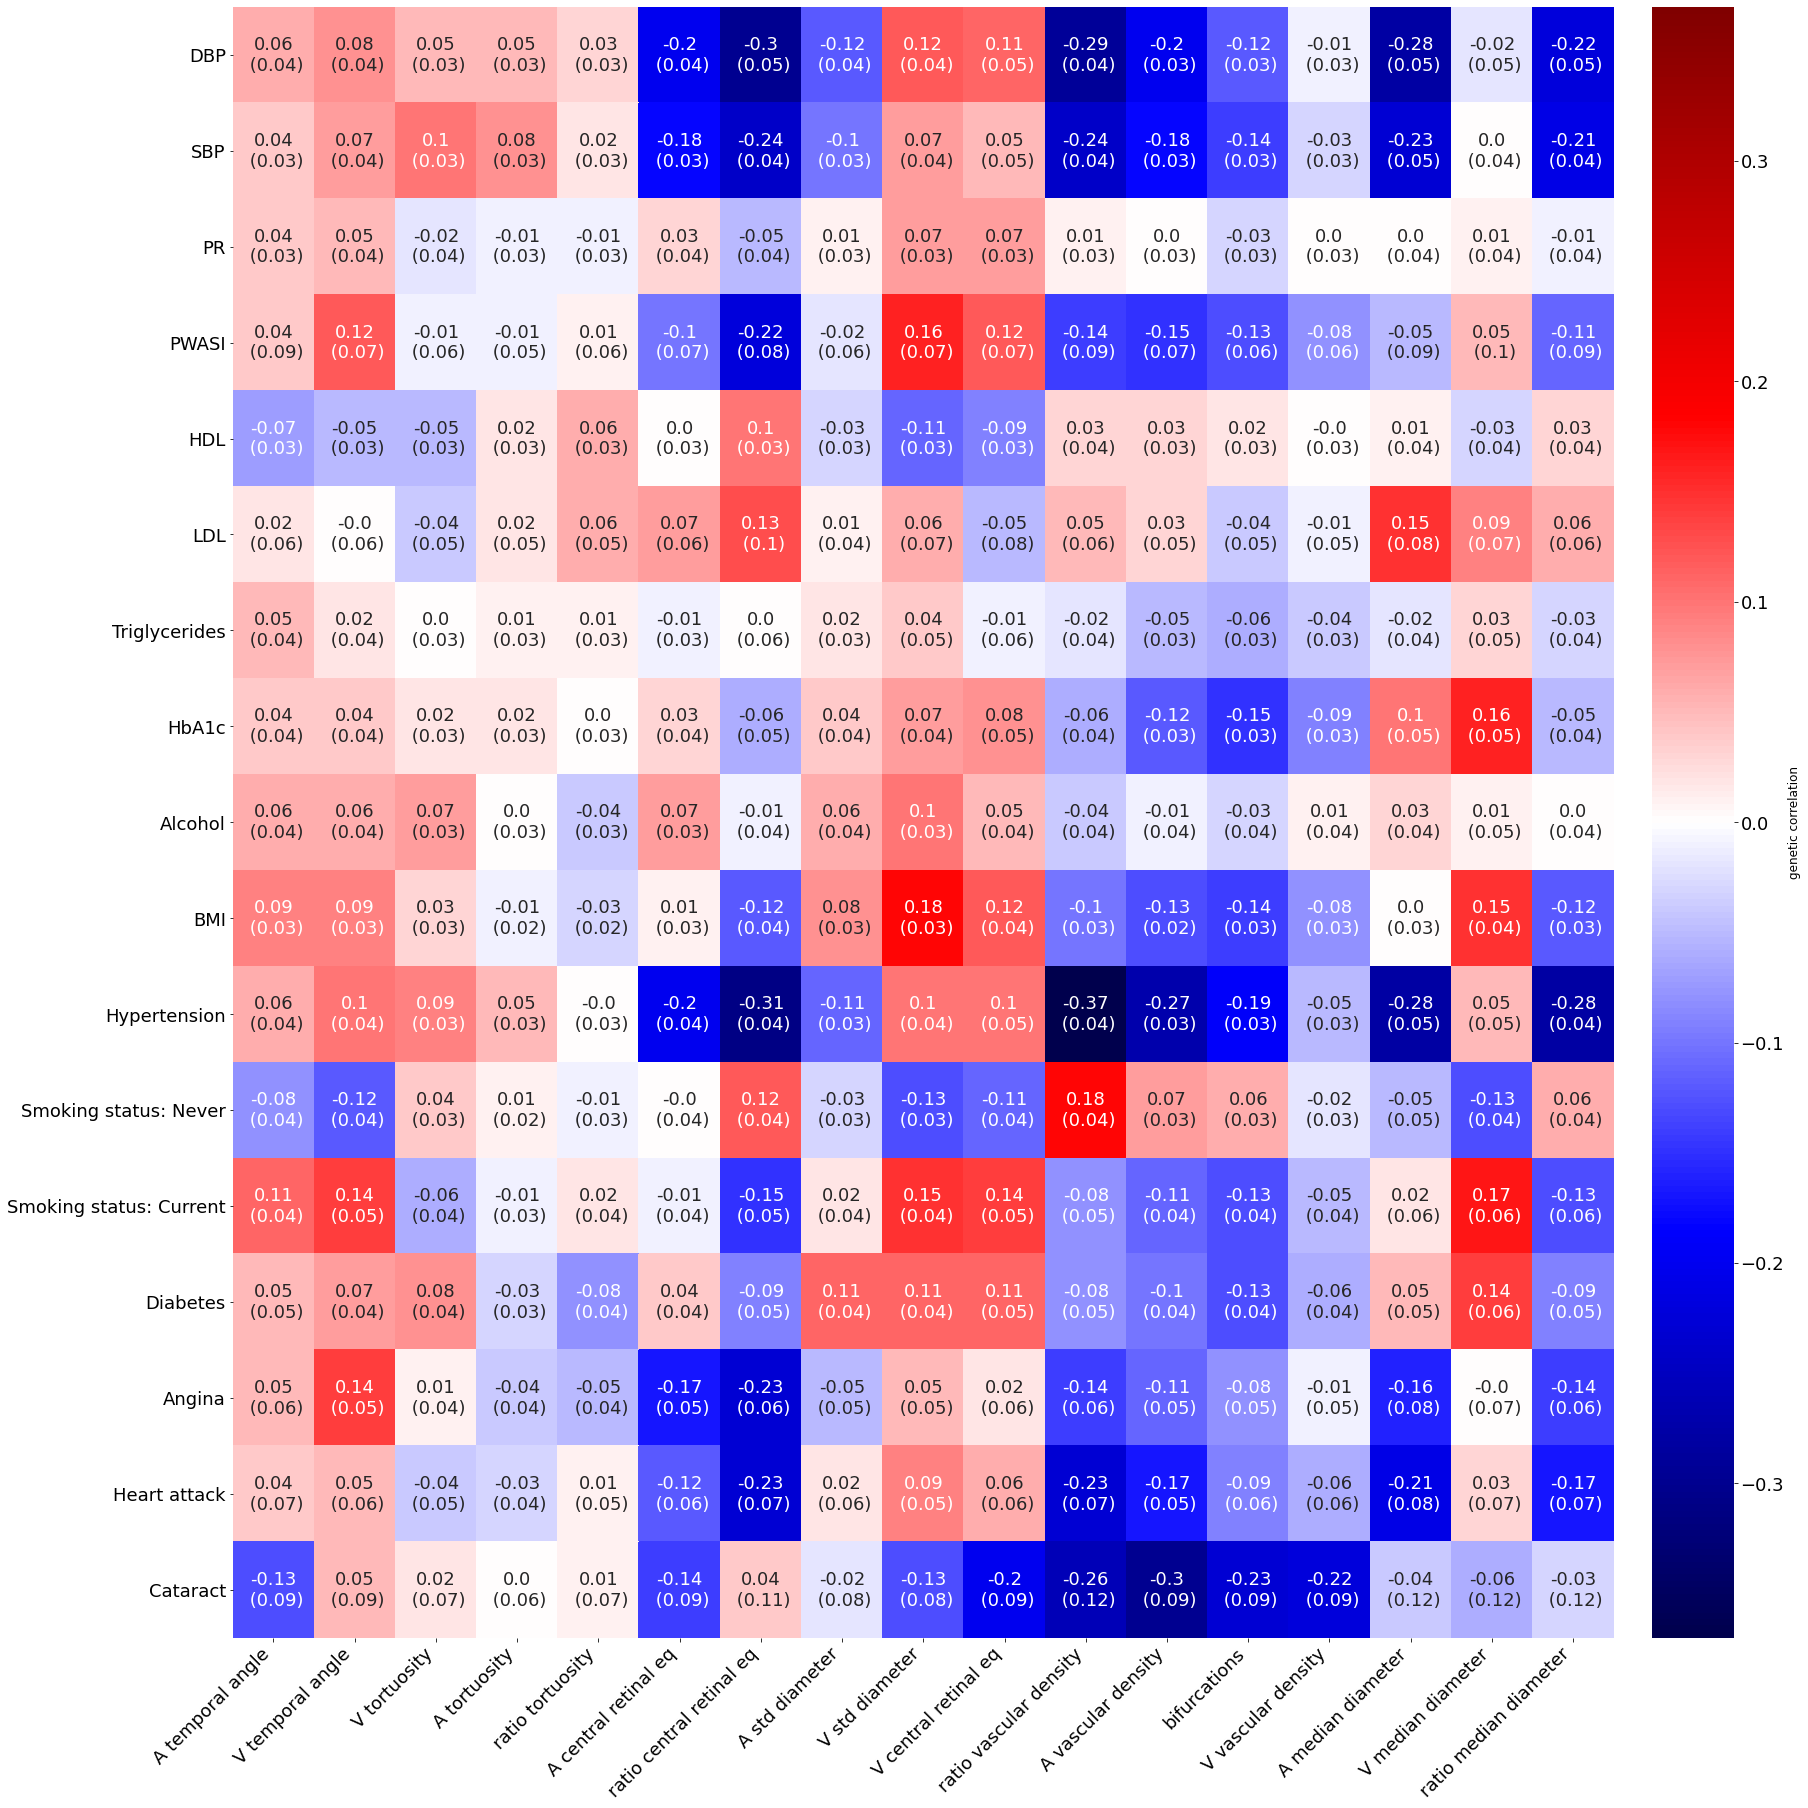

In [42]:
#print(df_corr_simpl.head(1))
df_corr_simpl= -1*df_corr_simpl.copy() ######harcoded!!!

df_corr_minus_std= (np.sign(df_corr_simpl))*((abs(df_corr_simpl) - abs(df_std_simpl)))
df_corr_minus_std = df_corr_minus_std.astype(float)

#print(df_corr_simpl.head(1))
df = df_corr_simpl.astype(str) + '\n (' + df_std_simpl.astype(str)+ ')'

df_corr_minus_std= df_corr_minus_std.T
df=df.T

df_corr_simpl = df_corr_simpl.astype(float)

plt.rcParams['font.size'] = '18'
#figsize_val_2=(30, 30)
if only_continuos == True:
    figsize_val_2=(25, 10)
else:
    figsize_val_2=(25, 25)
#figsize_val_2=(10, 10)
fig, ax = plt.subplots(figsize=figsize_val_2)
# fig1 = sns.heatmap(df_corr_minus_std, 
#             annot=df.values, #(log10p>Bonf_thresh).replace({True:'*', False:''}), 
#             cbar=True, #If not False
#             fmt="", #annot_kws={'weight': 'bold'}, 
#             vmin=-abs(df_corr_minus_std).max().max(),
#             vmax=abs(df_corr_minus_std).max().max(), 
#             cmap='seismic',alpha=1.0, cbar_kws={'label': 'minimum genetic correlation'},
#             ax=ax)

fig1 = sns.heatmap(df_corr_simpl.T, 
            annot=df.values, #(log10p>Bonf_thresh).replace({True:'*', False:''}), 
            cbar=True, #If not False
            fmt="", #annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_corr_simpl.T).max().max(),
            vmax=abs(df_corr_simpl.T).max().max(), 
            cmap='seismic',alpha=1.0, cbar_kws={'label': 'genetic correlation'},
            ax=ax)
plt.xticks(rotation=45, ha='right')

# Figure 2: genetic correlation with diseases

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'A temporal angle'),
  Text(1.5, 0, 'V temporal angle'),
  Text(2.5, 0, 'V tortuosity'),
  Text(3.5, 0, 'A tortuosity'),
  Text(4.5, 0, 'ratio tortuosity'),
  Text(5.5, 0, 'A central retinal eq'),
  Text(6.5, 0, 'ratio central retinal eq'),
  Text(7.5, 0, 'A std diameter'),
  Text(8.5, 0, 'V std diameter'),
  Text(9.5, 0, 'V central retinal eq'),
  Text(10.5, 0, 'ratio vascular density'),
  Text(11.5, 0, 'A vascular density'),
  Text(12.5, 0, 'bifurcations'),
  Text(13.5, 0, 'V vascular density'),
  Text(14.5, 0, 'A median diameter'),
  Text(15.5, 0, 'V median diameter'),
  Text(16.5, 0, 'ratio median diameter')])

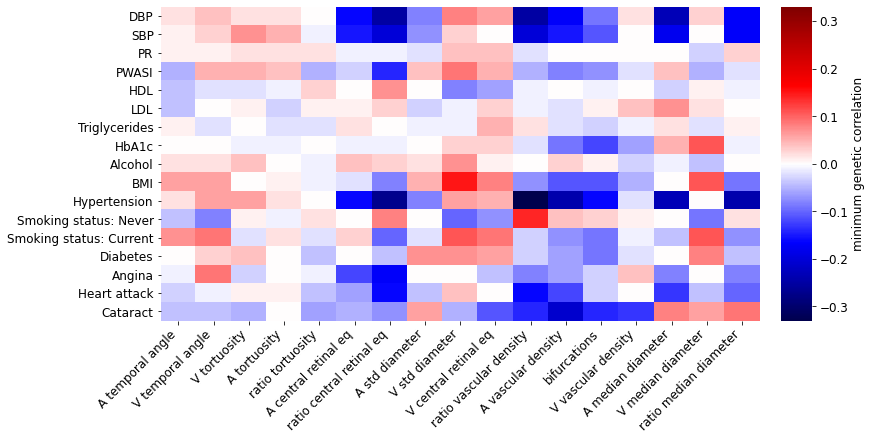

In [43]:
##min gcorr
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = '12'

if only_continuos == True:
    figsize_val=(10, 5)
else:
    figsize_val=(12, 6)


fig, ax = plt.subplots(figsize=figsize_val)
fig1 = sns.heatmap(df_corr_minus_std,  #(log10p>Bonf_thresh).replace({True:'*', False:''}), 
            cbar=True, #If not False
            fmt="", #annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_corr_minus_std).max().max(),
            vmax=abs(df_corr_minus_std).max().max(), 
            cmap='seismic',alpha=1.0, cbar_kws={'label': 'minimum genetic correlation'},
            ax=ax)
plt.xticks(rotation=45, ha='right')

# Figure 3: (with pvalues as stars)

In [44]:
###LinearR
Bonf_thresh_linear = (0.05 / (df_corr_simpl.shape[0] * df_corr_simpl.shape[1]))
Bonf_thresh2_linear = (0.001 / (df_corr_simpl.shape[0] * df_corr_simpl.shape[1]))

df_pval_simpl_log = df_pval_simpl
linear_log10p_copy = df_pval_simpl_log.copy()
linear_log10p_copy2 = df_pval_simpl_log.copy()
linear_log10p_copy3 = df_pval_simpl_log.copy()

In [45]:
linear_log10p_copy= (linear_log10p_copy<Bonf_thresh_linear).replace({True:'*', False:''})
linear_log10p_copy2= (linear_log10p_copy2<Bonf_thresh2_linear).replace({True:'*', False:''})
linear_log10p_copy3 =linear_log10p_copy+linear_log10p_copy2

In [50]:
list_con_cat_inter = list_risk_order 
list_bin_inter = list_binary_order

####other way to get the column names
#df_con_auxiliar_plot =  df_inf_csv[df_inf_csv['dtype'] == 'con']
#list_continuous_inter=set(list(df_con_auxiliar_plot['final_name']))&set(list(df_corr_simpl.columns))
#df_bin_auxiliar_plot = df_inf_csv[df_inf_csv['dtype'] == 'bin']
#df_cat_auxiliar_plot = df_inf_csv[df_inf_csv['dtype'] == 'cat']

#list_bin_inter = set(list(df_corr_simpl.columns))&set(list(df_bin_auxiliar_plot['final_name']))

#list_risk_order = ['DBP', 'SBP', 'PR', 'PWASI', 'HDL', 'LDL', 'Triglycerides',  'HbA1c', 'Alcohol','BMI'] #hardcoded to be in order
#list_con_cat_inter = list_risk_order #set(list(df_corr_simpl.columns))&set(list(df_con_auxiliar_plot['final_name']) + list(df_cat_auxiliar_plot['final_name']))

In [51]:
## separate into con and bin-cat to make the plot
df_corr_simpl_cont = df_corr_simpl[list_con_cat_inter]
linear_log10p_copy3_cont = linear_log10p_copy3[list_con_cat_inter]
df_corr_simpl_bin = df_corr_simpl[list_bin_inter]
linear_log10p_copy3_bin = linear_log10p_copy3[list_bin_inter]
#
#df_corr_simpl_cont = df_corr_simpl_cont.sort_values(by=list_risk_order, axis=0)
#linear_log10p_copy3_cont = linear_log10p_copy3_cont.sort_values(by=list_risk_order, axis=0)

<Figure size 432x288 with 0 Axes>

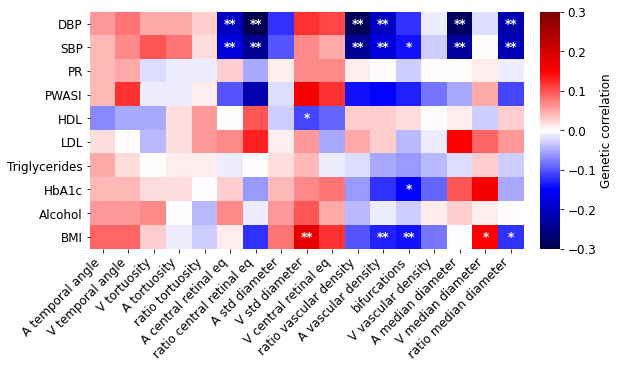

In [52]:

def individual_star(figsize_val, df_corr_simpl_cont, linear_log10p_copy3_cont):
   f = plt.figure()
   plt.rcParams['font.size'] = '12'
   plt.rcParams['axes.labelsize'] = 12
   plt.rcParams['axes.titlesize'] = 12
   plt.rcParams['figure.constrained_layout.use'] = True

   
   fig, ax = plt.subplots(figsize=figsize_val)
   fig1 = sns.heatmap(df_corr_simpl_cont .T, 
               annot=linear_log10p_copy3_cont .T, 
               cbar=True, #If not False
               fmt="", annot_kws={'weight': 'bold'}, 
               vmin=-abs(df_corr_simpl_cont .T).max().max(), 
               vmax=abs(df_corr_simpl_cont .T).max().max(), 
               cmap='seismic',alpha=1.0, cbar_kws={'label': 'Genetic correlation'}
                  )
   fig1.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')
   #fig.savefig('/SSD/home/sofia/genetic_corr_diseases.jpg', dpi=300, format='jpg', bbox_inches='tight', pad_inches=0.1)

figsize_val=(8.5, 5)
individual_star(figsize_val, df_corr_simpl_cont, linear_log10p_copy3_cont)

<Figure size 432x288 with 0 Axes>

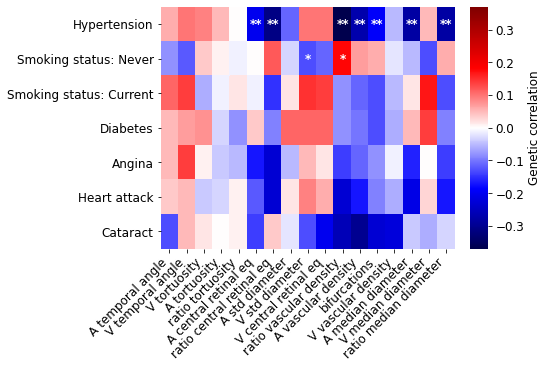

In [61]:
figsize_val=(7.5, 5)
individual_star(figsize_val, df_corr_simpl_bin, linear_log10p_copy3_bin)

In [54]:
### Reorder, harcoded!:
#######
#list_risk_order = ['DBP', 'SBP', 'PR', 'PWASI', 'HDL', 'LDL', 'Triglycerides',  'HbA1c', 'Alcohol','BMI'] #hardcoded to be in order
#list_binary_order = ['Hypertension','Smoking status: Never', 'Smoking status: Current', #'Glasses myopia *', 'Diabetes', 'Angina', 'Heart attack', #'Glaucoma *', 'Cataract'] #'Coronary atherosclerosis *']

list_con_cat_inter = list(df_corr_simpl_cont)
list_bin_inter = list(df_corr_simpl_bin)

if len(list_risk_order)==len(list_con_cat_inter)==len(set(list_risk_order) & set(list_con_cat_inter)):
    print('Same size, continue')
    df_corr_simpl_cont = df_corr_simpl_cont[list_risk_order]
else:
    print('ERROR')

if len(list_bin_inter)==len(list_binary_order)==len(set(list_bin_inter) & set(list_binary_order)):
    print('Same size, continue')
    df_corr_simpl_bin = df_corr_simpl_bin[list_binary_order]

else:
    print('ERROR')

print('Continuous: ', len(list_risk_order), len(list_con_cat_inter), len(set(list_risk_order) & set(list_con_cat_inter)))
print('Binary: ', len(list_bin_inter), len(list_binary_order), len(set(list_bin_inter) & set(list_binary_order)))


Same size, continue
Same size, continue
Continuous:  10 10 10
Binary:  7 7 7


<Figure size 432x288 with 0 Axes>

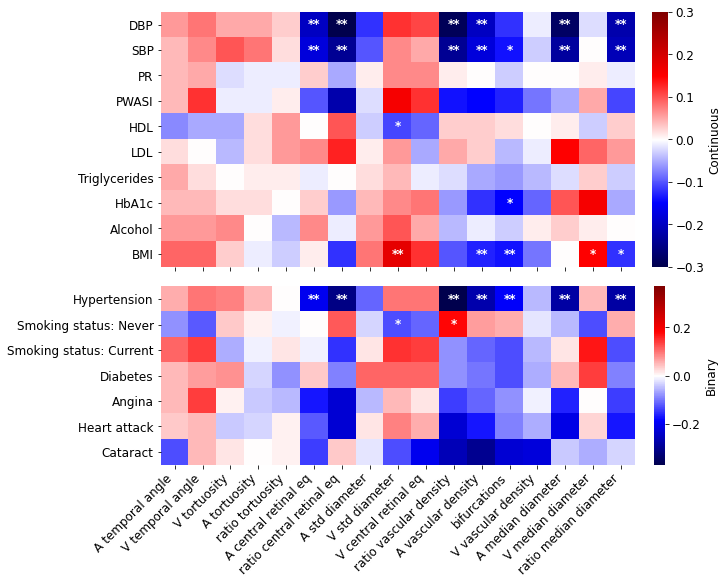

In [62]:
f = plt.figure()
#f.set_figwidth(15)
#f.set_figheight(20)


figsize_val=(10, 8)
f, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize_val, gridspec_kw={'height_ratios': [len(df_corr_simpl_cont.T), len(df_corr_simpl_bin.T)]})


plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['font.size'] = '12'
fig1 = sns.heatmap(df_corr_simpl_cont .T, 
            annot=linear_log10p_copy3_cont .T, 
            cbar=True, #If not False
            fmt="", annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_corr_simpl_cont .T).max().max(), 
            vmax=abs(df_corr_simpl_cont .T).max().max(), 
            cmap='seismic',alpha=1.0, cbar_kws={'label': 'Continuous'},
               ax=ax1)
fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right', visible=False)


fig2 = sns.heatmap(df_corr_simpl_bin.T, 
            annot=linear_log10p_copy3_bin.T, #(log10p>Bonf_thresh).replace({True:'*', False:''}), 
            cbar=True, #False
            fmt="", annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_corr_simpl_bin.T).max().max(), 
            vmax=abs(df_corr_simpl_bin.T).max().max(), 
            cmap='seismic', alpha=1.0, cbar_kws={'label': 'Binary'},
               ax=ax2)
fig2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha='right')

f.savefig('/SSD/home/sofia/2023_07_31_continuous_binary_diseases_ldsr.jpg', dpi=300, format='jpg', bbox_inches='tight', pad_inches=0.1)
   

# SCATTER PLOT PHENOTYPIC- GENETIC ASSOCIATION WITH DISEASES

In [63]:
### genetic value == df_corr_minus_std OR df_corr (TO DECIDE)
### phenotypic value == betas

####Phenotypic association with diseases:
file_info_name='pheno_diseases_info.csv'
pheno_info_file = f'/SSD/home/sofia/retina-phenotypes/complementary/{file_info_name}'

display_info=True
date='2022_11_23'
ventile='covar_fix'

diseases_dir ='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/diseases_cov/'
betas = pd.read_csv(f'{diseases_dir}reg_betas_.csv', index_col=0)
log10p = pd.read_csv(f'{diseases_dir}reg_log10p_.csv', index_col=0)
betas = betas.astype('float64') # in case betas was coded as object type
## Rename columns and index
df_inf_filt_LR =  df_inf_csv[df_inf_csv['main_supl']=='main']
df_inf_filt_LR = df_inf_filt_LR.append(df_inf_csv[df_inf_csv['main_supl']=='hr'])
list_diseases_LR = df_inf_filt_LR['name_LR'].values
list_diseases_LR_new = df_inf_filt_LR['final_name'].values
betas= rename_col_index(betas, list(traits_phenos), list(traits_phenos_new), list(list_diseases_LR), list(list_diseases_LR_new))
## Diseases == y-axis and Vascular phenos == x-axis
betas = betas.T

In [64]:
print('ATENTION! -> Phenoty and genetically we have different sizes, we do not have biyective function between them. So it is needed to make decisions')
print('len(df_corr_minus_std) and len(betas): ', len(df_corr_minus_std), len(betas))
print(df_corr_minus_std.index, betas.index)
list_intersection_phe_gen = list(set(df_corr_minus_std.index) & set(betas.index))
print('They have in common ', len(list_intersection_phe_gen), ' -> names: ', list_intersection_phe_gen)

ATENTION! -> Phenoty and genetically we have different sizes, we do not have biyective function between them. So it is needed to make decisions
len(df_corr_minus_std) and len(betas):  17 32
Index(['DBP', 'SBP', 'PR', 'PWASI', 'HDL', 'LDL', 'Triglycerides', 'HbA1c',
       'Alcohol', 'BMI', 'Hypertension', 'Smoking status: Never',
       'Smoking status: Current', 'Diabetes', 'Angina', 'Heart attack',
       'Cataract'],
      dtype='object') Index(['DBP', 'SBP', 'Hypertension', 'PR', 'PWASI', 'HDL', 'LDL',
       'Triglycerides', 'HbA1c', 'Alcohol', 'N_cigarettes_curr_daily_both',
       'Smoking', 'BMI', 'Glaucoma', 'Cataract', 'Amblyopia', 'Presbyopia',
       'Hypermetropia', 'Myopia', 'Astigmatism', 'Diabetes-eye', 'Other ED',
       'Diabetes', 'Angina', 'Heart attack', 'DVT', 'Stroke', 'PE',
       'Atherosclerosis', 'date_disorders_arteries_arterioles',
       'Alzheimer's disease', 'Mortality'],
      dtype='object')
They have in common  15  -> names:  ['PR', 'Triglycerides', '

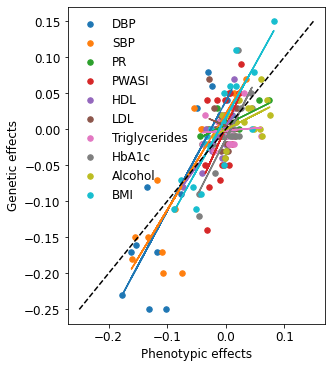

In [68]:
## PLOTS:
plt.rcParams['font.size'] = '12'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
marker_size = 30

import scipy
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value, r_value**2

def phen_gen_scatter(df_1, df_2, name_title):
    df_index=df_1
    print(df_1.index)
    #df_index['index']= df_1.index
    #print(df_index['index'])

    fig = plt.gcf()
    fig.set_size_inches(7.5, 7.5)
    for col in df_1.columns:
        plt.scatter(df_1[col], df_2[col], label=col)
        r_value, r_value2 = rsquared(df_1[col], df_2[col])
        print( col , r_value2)
        z = np.polyfit(np.array(df_1[col]), np.array(df_2[col]), 1)
        p = np.poly1d(z)
        #add trendline to plot
        plt.plot(np.array(df_1[col]), p(np.array(df_1[col])))
    plt.legend(loc='best', fontsize=12)
    plt.xlabel('Phenotypic effects')
    plt.ylabel('Genetic effects')
    plt.title(name_title)
    plt.show()
    #fig.savefig('test2png.png', dpi=100)

def phen_gen_scatter_diag(df_1, df_2, name_title):
    #df_index=df_1
    #df_index['index']= df_1.index

    fig = plt.gcf()
    fig.set_size_inches(7.5, 7.5)
    for col in df_1.columns:
        plt.scatter(df_1[col], df_2[col], label=col)

    #plt.scatter(c=df_index['index'],  cmap="jet")
    ident = [-0.25, 0.15]
    plt.plot(ident,ident, color='black', linestyle='dashed')
    plt.legend(loc='best', fontsize=12)
    plt.xlabel('Phenotypic effects')
    plt.ylabel('Genetic effects')
    plt.title(name_title)
    plt.show()
    #fig.savefig('test2png.png', dpi=100)


def phen_gen_scatter_diag_tend(df_1, df_2):
    fig = plt.gcf()
    fig.set_size_inches(4.5, 5)
    for col in df_1.columns:
        plt.scatter(df_1[col], df_2[col], label=col, s=marker_size)
        z = np.polyfit(np.array(df_1[col]), np.array(df_2[col]), 1)
        p = np.poly1d(z)
        # Add trendline to plot
        plt.plot(np.array(df_1[col]), p(np.array(df_1[col])))

    ident = [-0.25, 0.15]
    plt.plot(ident, ident, color='black', linestyle='dashed')

    # Get handles and labels for the scatter plot
    handles, labels = plt.gca().get_legend_handles_labels()

    # Create a custom legend with desired format and remove the legend border
    legend = plt.legend(handles, labels, loc='best', fontsize=12, frameon=False)
    legend.get_frame().set_linewidth(0)  # Remove legend border

    plt.xlabel('Phenotypic effects')
    plt.ylabel('Genetic effects')
    plt.show()
    fig.savefig('/SSD/home/sofia/phen_gen_scatter_diag_tend_binary.jpg', dpi=300, format='jpg', bbox_inches='tight', pad_inches=0.1)


def phen_gen_scatter_one_at_the_time(df_1, df_2, name_title):
    for col in df_1.columns:
        fig = plt.gcf()
        fig.set_size_inches(7.5, 7.5)
        plt.scatter(df_1[col], df_2[col], label=col)
        z = np.polyfit(np.array(df_1[col]), np.array(df_2[col]), 1)
        p = np.poly1d(z)
        #add trendline to plot
        plt.plot(np.array(df_1[col]), p(np.array(df_1[col])))
        plt.legend(loc='best', fontsize=12)
        plt.xlabel('Phenotypic effects')
        plt.ylabel('Genetic effects')
        plt.title(name_title)
        plt.show()
    #fig.savefig('test2png.png', dpi=100)

def phen_gen_scatter_one_at_the_time_diag(df_1, df_2, name_title):
    for col in df_1.columns:
        fig = plt.gcf()
        fig.set_size_inches(7.5, 7.5)
        plt.scatter(df_1[col], df_2[col], label=col)
        ident = [-0.25, 0.15]
        plt.plot(ident,ident)
        plt.legend(loc='best', fontsize=12)
        plt.xlabel('Phenotypic effects')
        plt.ylabel('Genetic effects')
        plt.title(name_title)
        plt.show()

#phen_gen_scatter(betas, df_corr_minus_std)

### ONLY INTERSECTION:
betas_intersection = betas.T
betas_intersection = betas_intersection[list_risk_order] #harcoded to to be in oder= list_risk_order #list_intersection_phe_gen

df_corr_simpl = df_corr_simpl.astype(float)
df_genetic_corr = df_corr_minus_std #df_corr_simpl.T  # df_corr_minus_std or df_corr_simpl

##### for binary ######
#### you can use both: df_corr_minus_std.T or df_corr_simpl
df_geno_used_binary = df_corr_minus_std.T # or df_corr_simpl, df_corr_minus_std.T
#######################

df_corr_minus_std_intersection = df_genetic_corr.T
df_corr_minus_std_intersection = df_corr_minus_std_intersection[list_risk_order] ##harcoded to to be in oder

### TENDENCY LINE
#phen_gen_scatter(betas_intersection, df_corr_minus_std_intersection, 'Tendency line')
#phen_gen_scatter(betas_intersection.T, df_corr_minus_std_intersection.T, 'Tendency line')

#phen_gen_scatter_one_at_the_time(betas_intersection, df_corr_minus_std_intersection, 'Tendency line')
#phen_gen_scatter_one_at_the_time(betas_intersection.T, df_corr_minus_std_intersection.T, 'Tendency line')

### DIAGONAL 
#phen_gen_scatter_diag(betas_intersection, df_corr_minus_std_intersection, 'Diagonal line')
#phen_gen_scatter_diag(betas_intersection.T, df_corr_minus_std_intersection.T, 'Diagonal line')

### Both 
phen_gen_scatter_diag_tend(betas_intersection, df_corr_minus_std_intersection)
#phen_gen_scatter_diag_tend(betas_intersection.T, df_corr_minus_std_intersection.T)

#phen_gen_scatter_one_at_the_time_diag(betas_intersection, df_corr_minus_std_intersection, 'Diagonal line')
#phen_gen_scatter_one_at_the_time_diag(betas_intersection.T, df_corr_minus_std_intersection.T, 'Diagonal lin

['Hypertension', 'Smoking status: Never', 'Smoking status: Current', 'Diabetes', 'Angina', 'Heart attack', 'Cataract']
['Hypertension', 'Smoking status: Never', 'Smoking status: Current', 'Diabetes', 'Angina', 'Heart attack', 'Cataract']


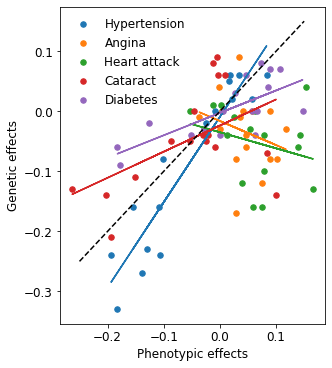

In [69]:
#### FOR BINARY 
betas_intersection_2 = betas.T
cleaned_list = [item.replace(' *', '') for item in list_binary_order]
print(cleaned_list)
renamed_list = [item.replace('Smoking status: current', 'Smoking').replace('Glasses myopia', 'Myopia') for item in cleaned_list]
print(renamed_list)
betas_intersection_2 = betas_intersection_2[list(set(renamed_list)&set(betas_intersection_2.columns))] #harcoded to to be in oder= list_risk_order #list_intersection_phe_gen

df_corr_simpl = df_corr_simpl.astype(float)
df_genetic_corr = df_corr_minus_std #df_corr_simpl.T  # df_corr_minus_std or df_corr_simpl

##### for binary ######
#### you can use both: df_corr_minus_std.T or df_corr_simpl
#df_geno_used_binary = df_corr_minus_std.T # or df_corr_simpl, df_corr_minus_std.T
#######################

df_corr_minus_std_intersection_2 = df_genetic_corr.T

original_index = df_corr_minus_std_intersection_2.columns
cleaned_index = [item.replace(' *', '') for item in original_index]
renamed_index = [item.replace('Smoking status: current', 'Smoking').replace('Glasses myopia', 'Myopia') for item in cleaned_index]

# Update the index of the DataFrame
df_corr_minus_std_intersection_2.columns = renamed_index

df_corr_minus_std_intersection_2 = df_corr_minus_std_intersection_2[renamed_index] ##hardcoded
phen_gen_scatter_diag_tend(betas_intersection_2, df_corr_minus_std_intersection_2)

#######

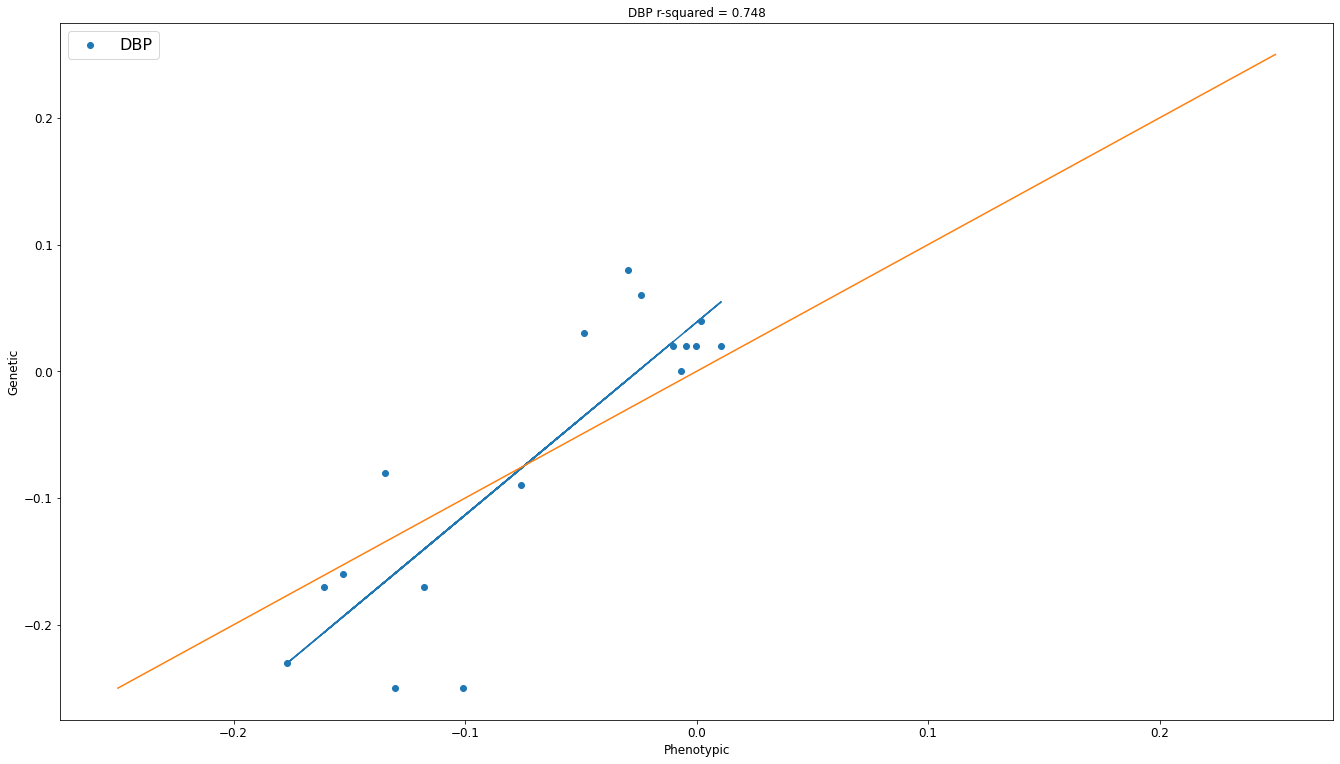

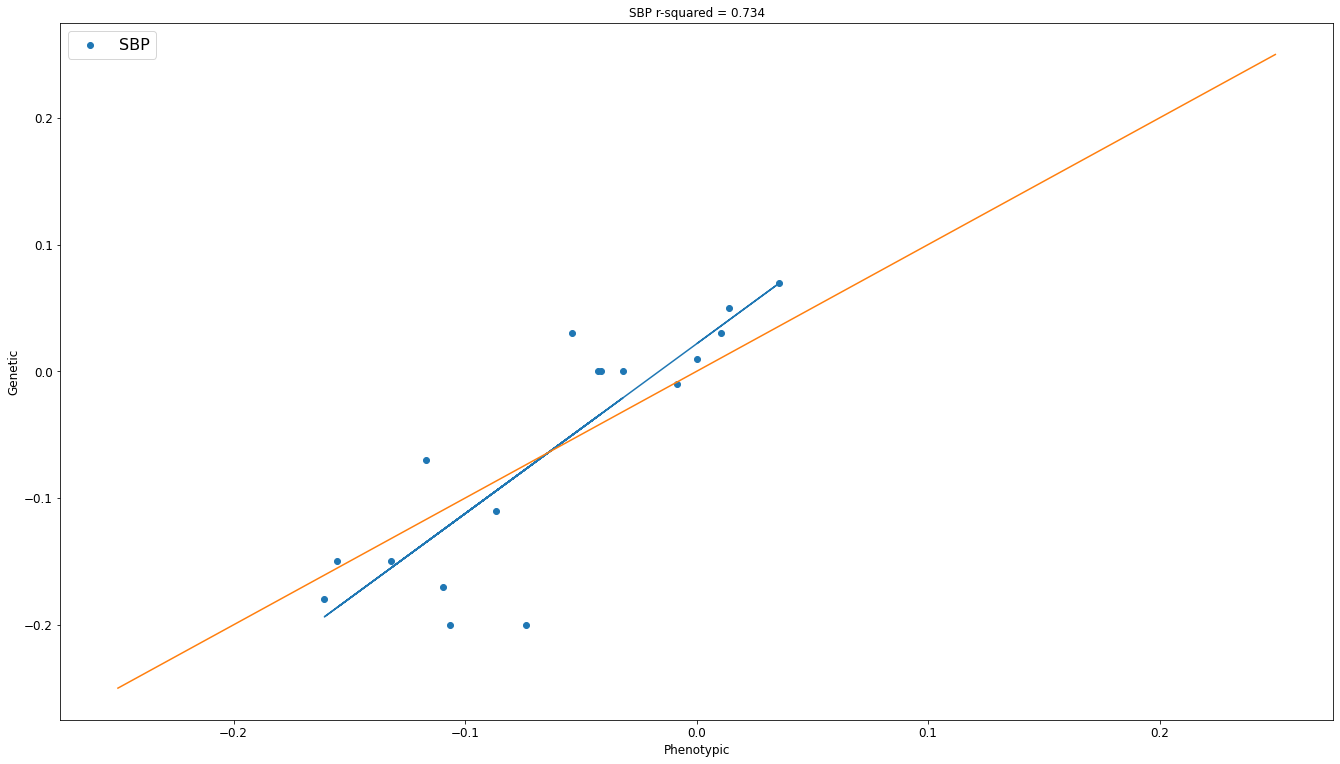

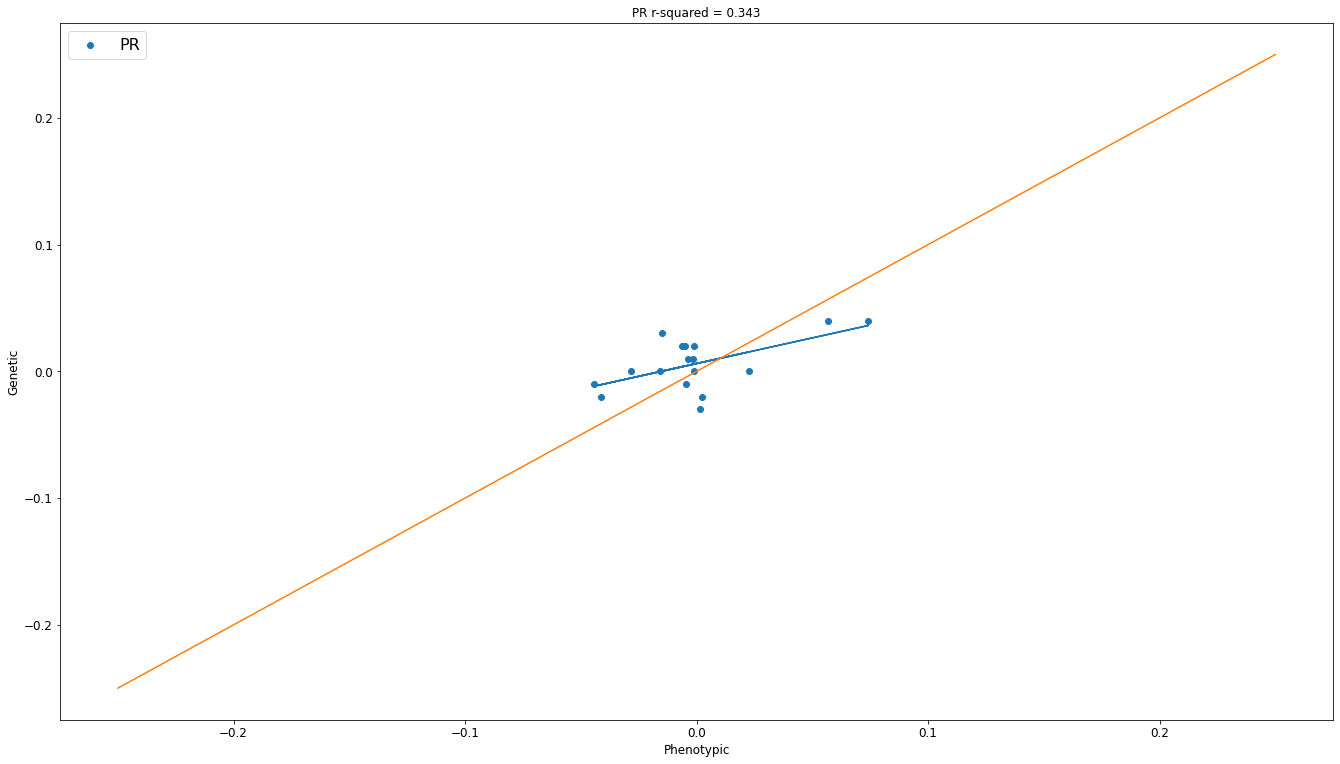

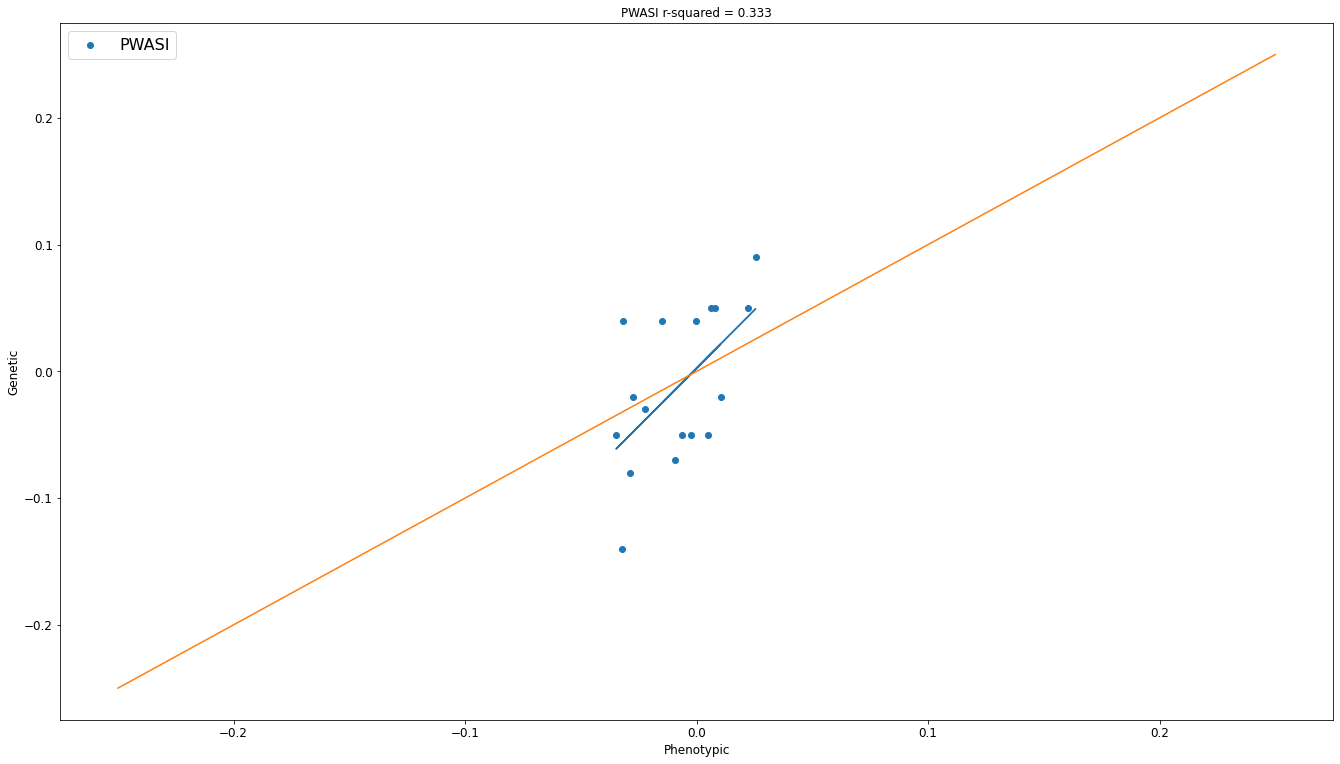

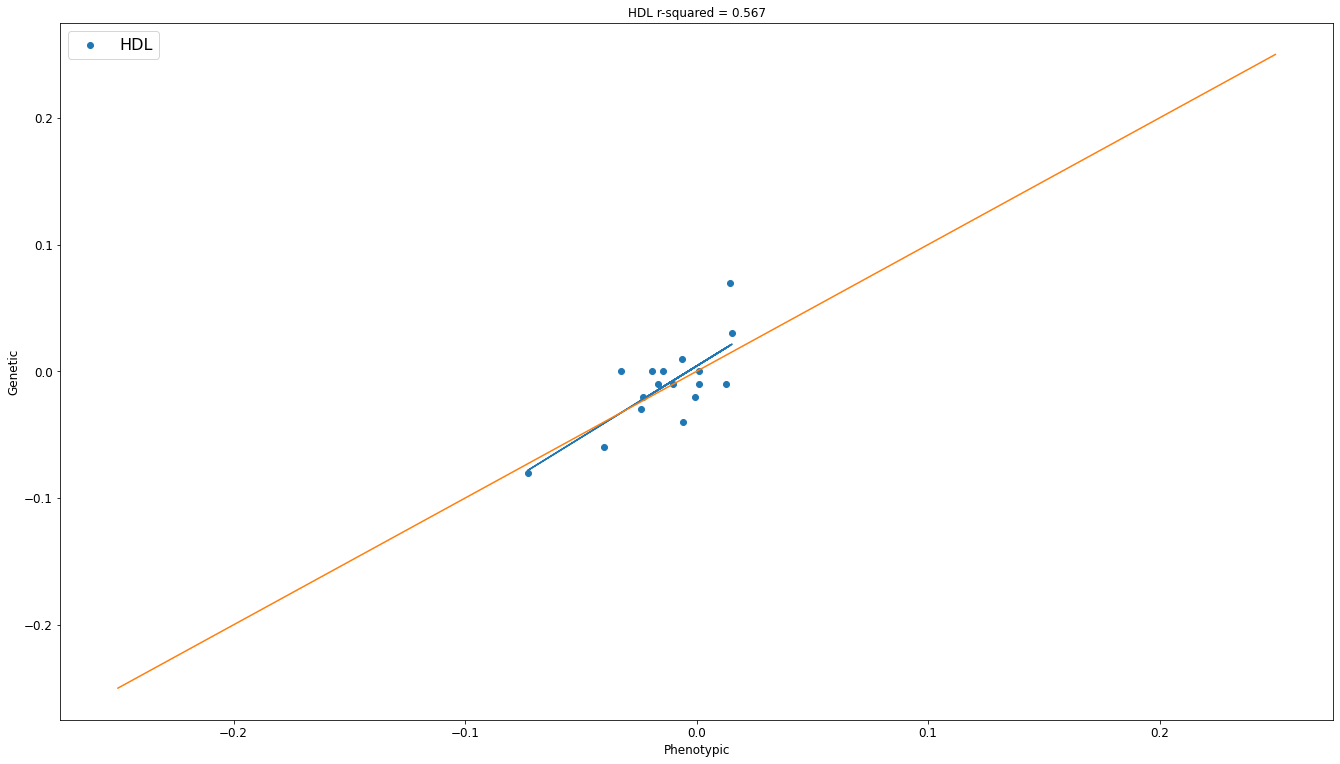

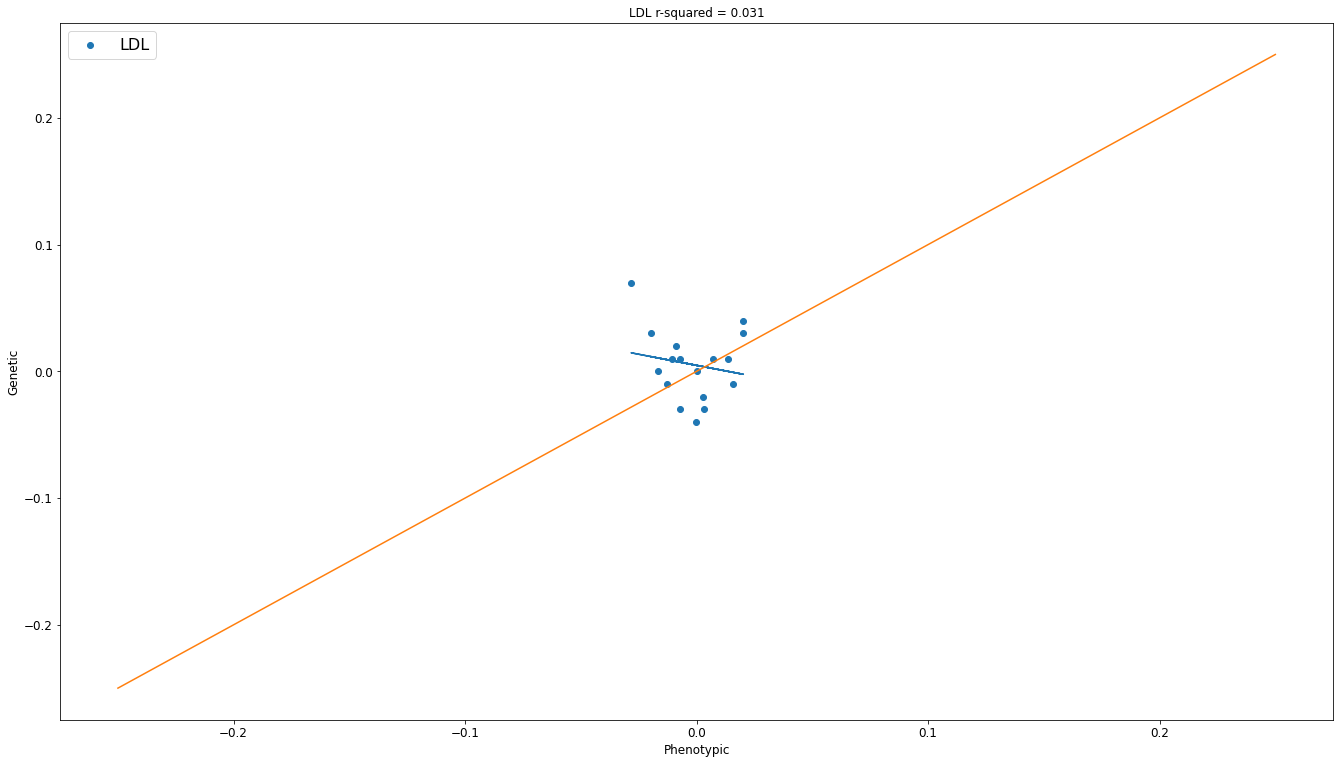

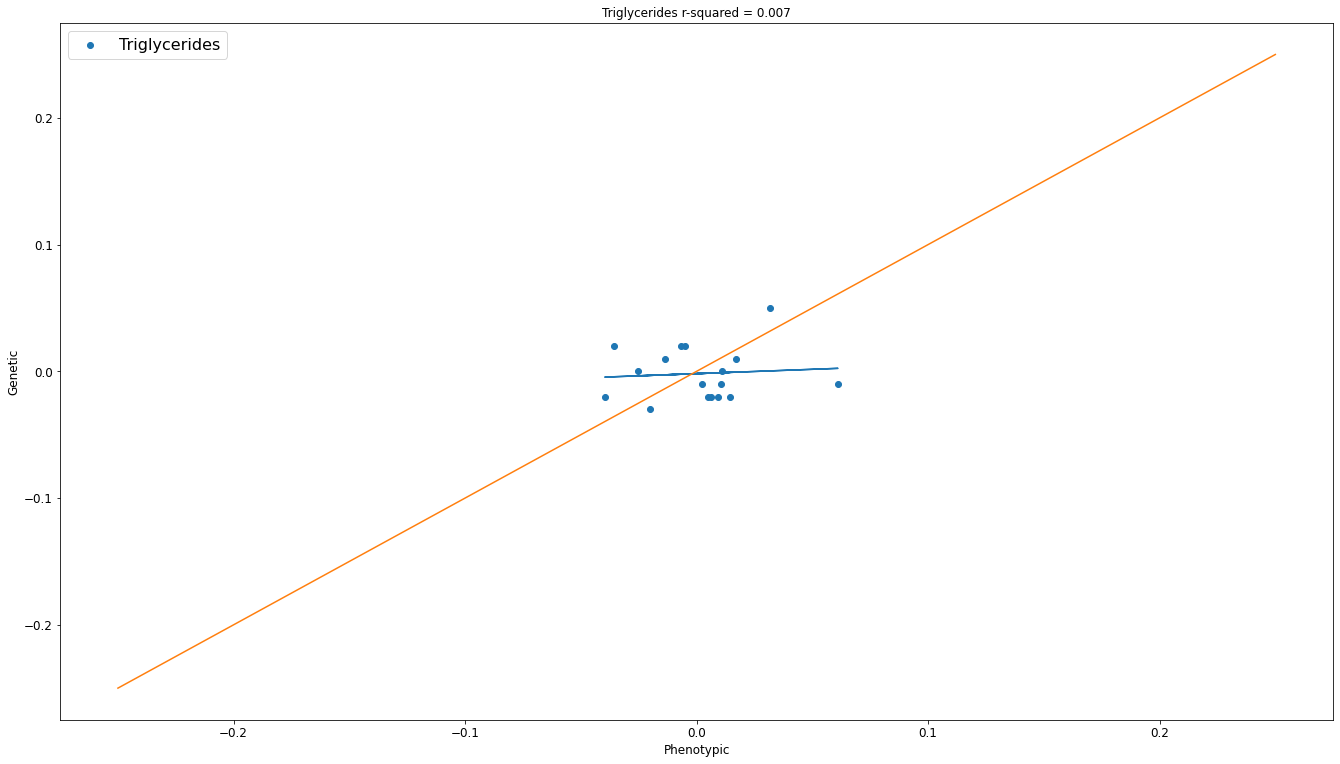

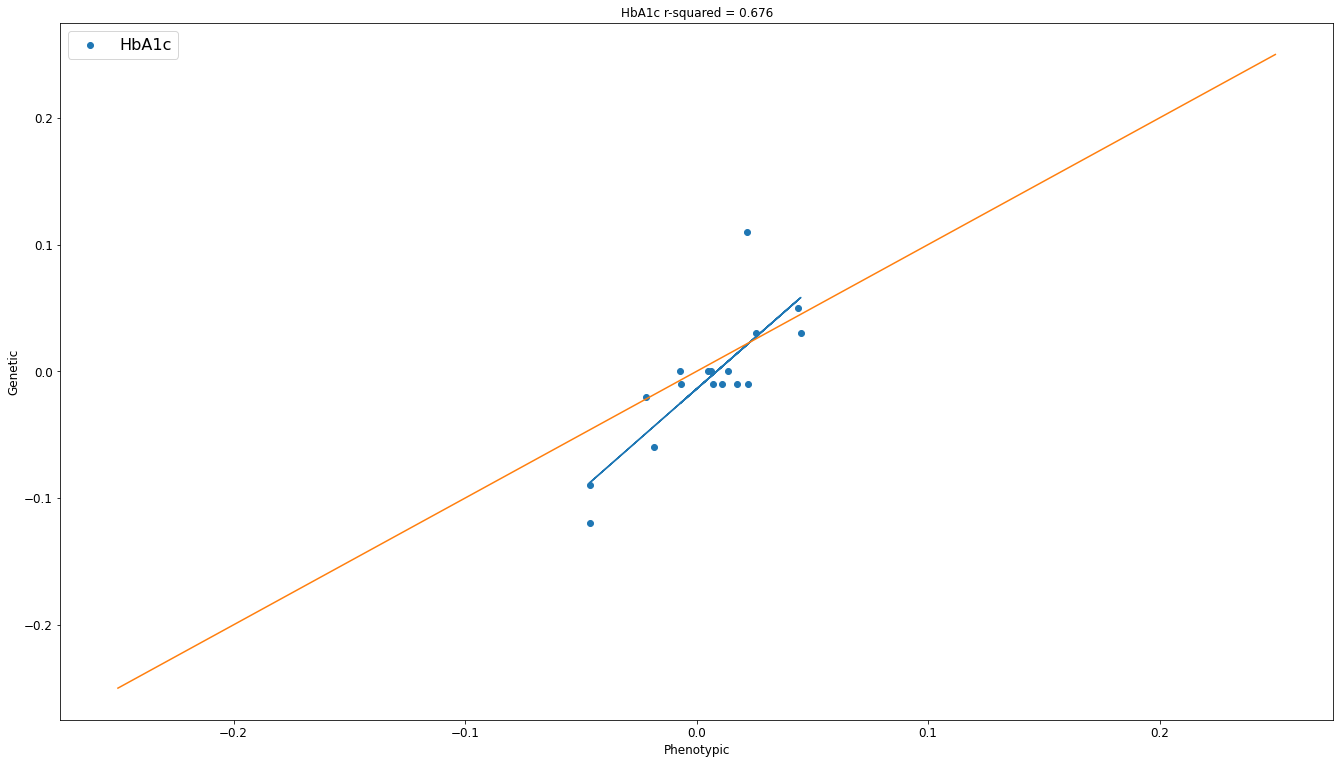

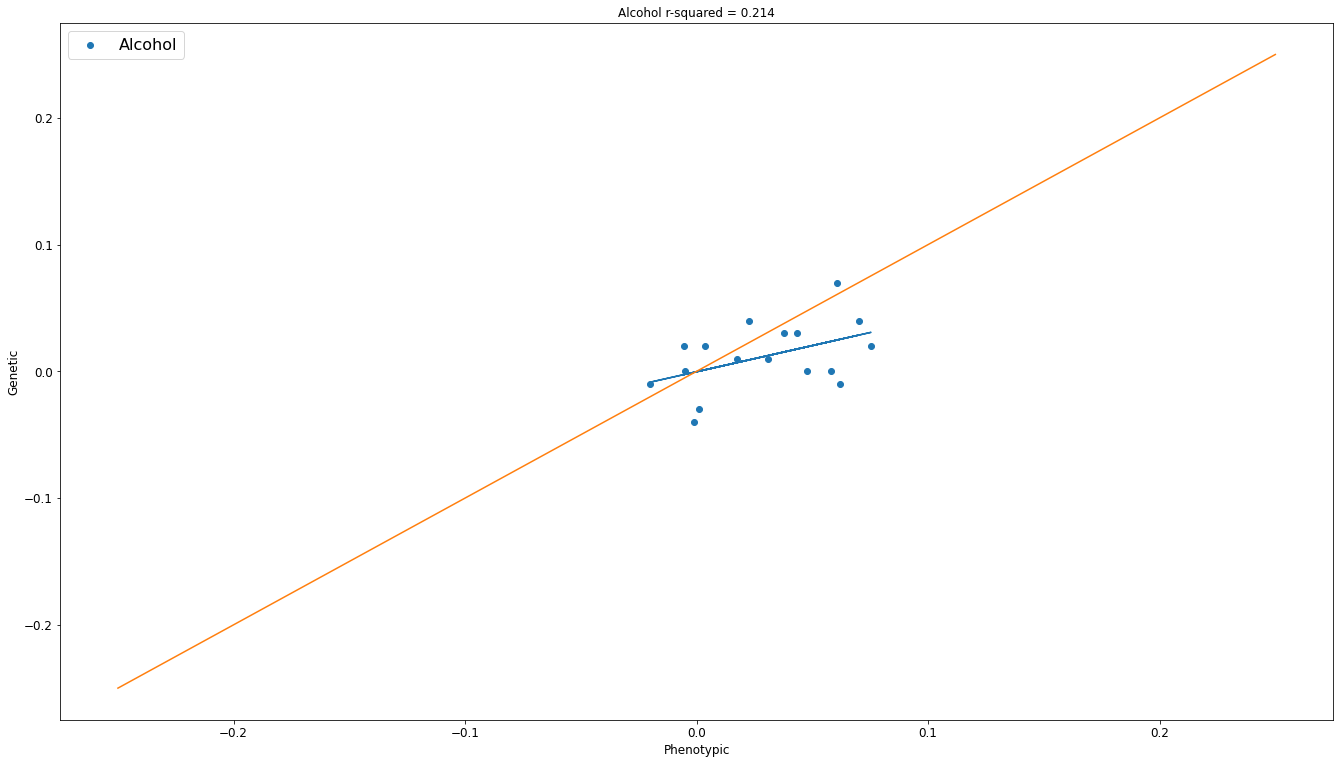

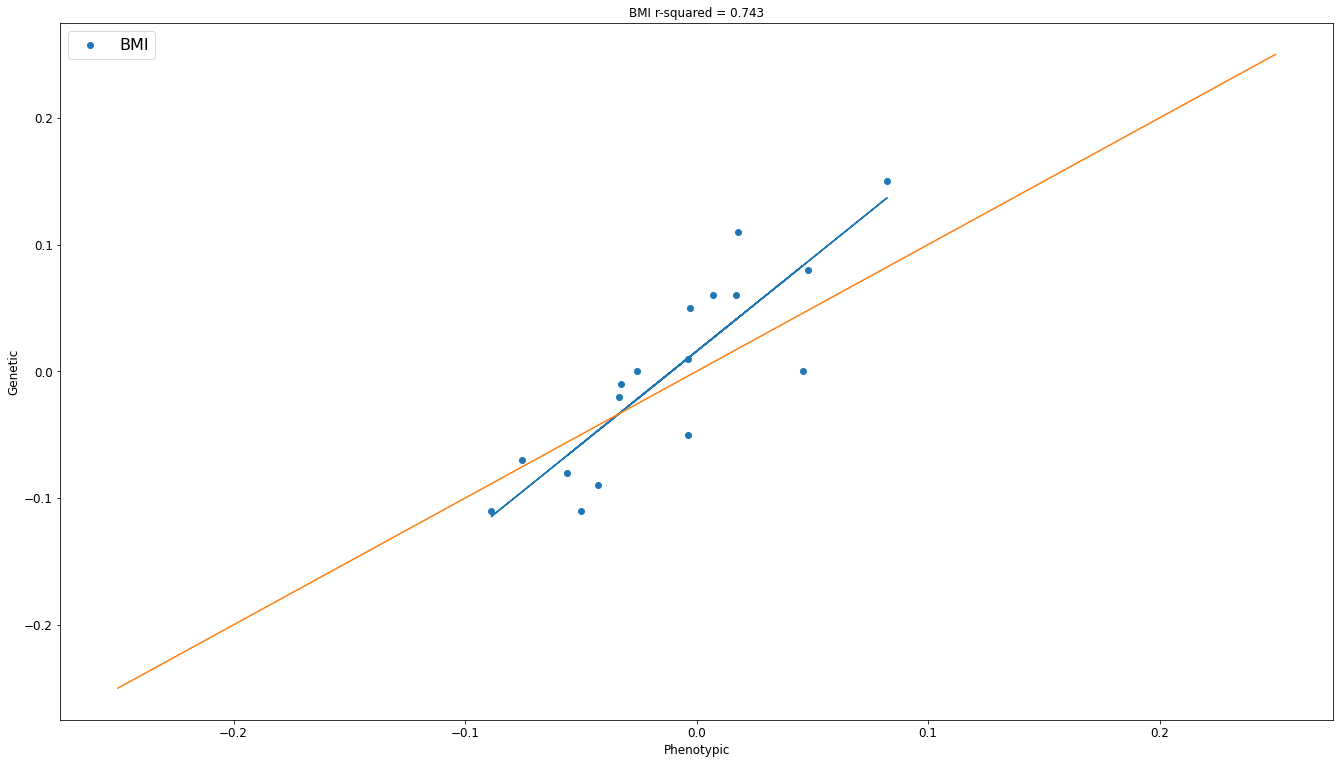

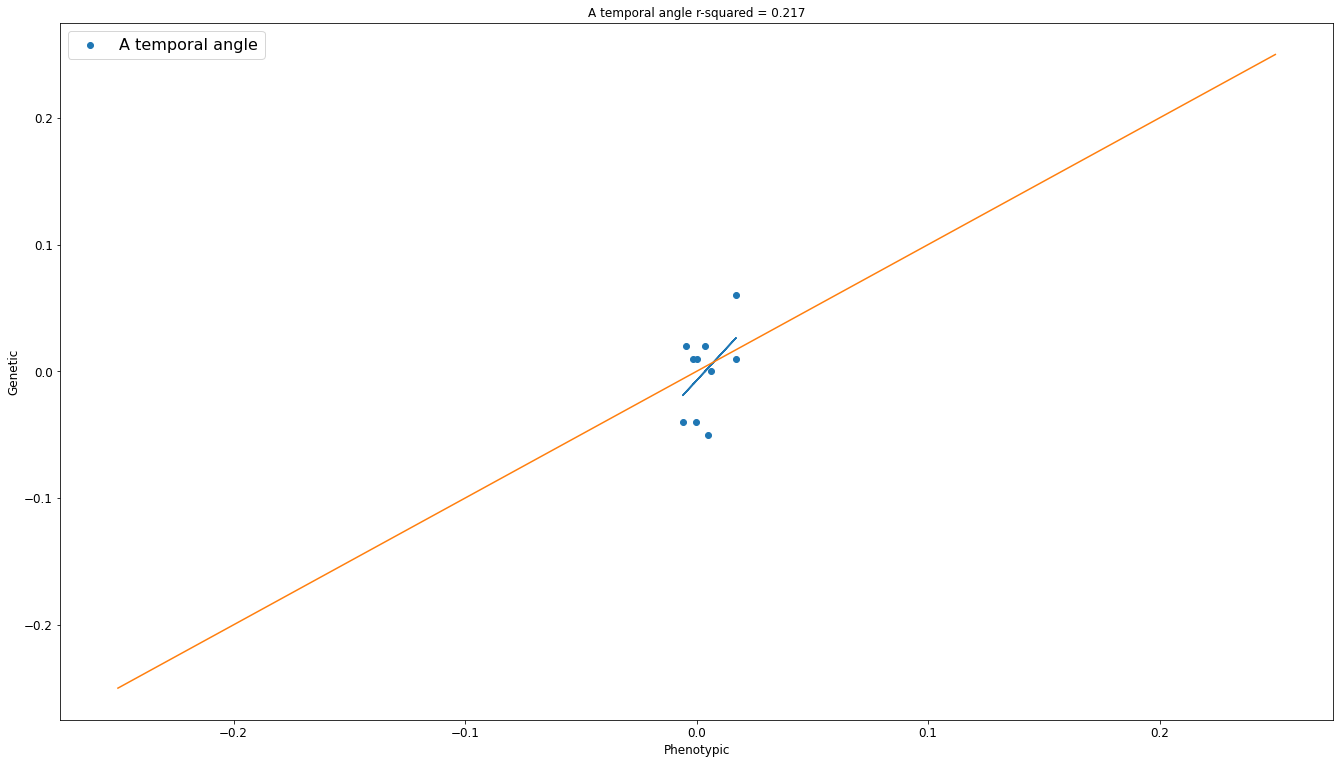

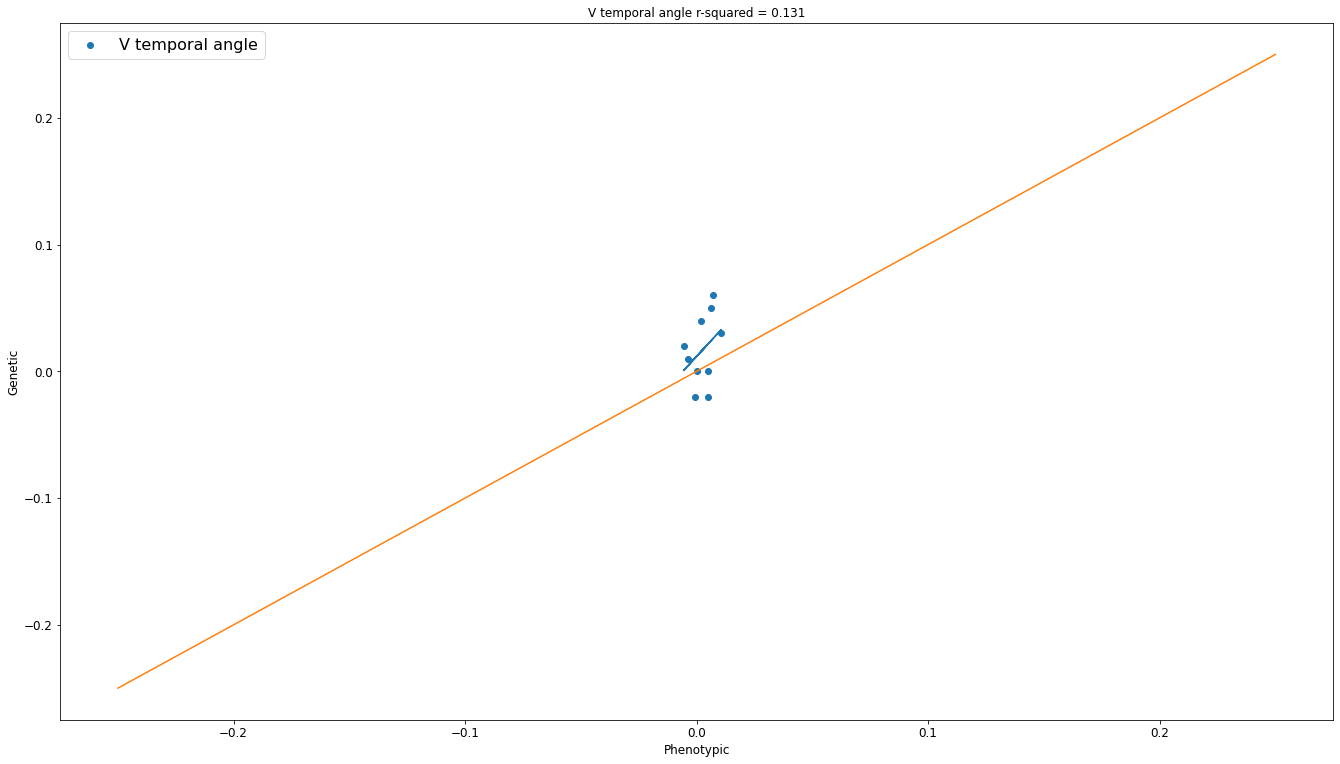

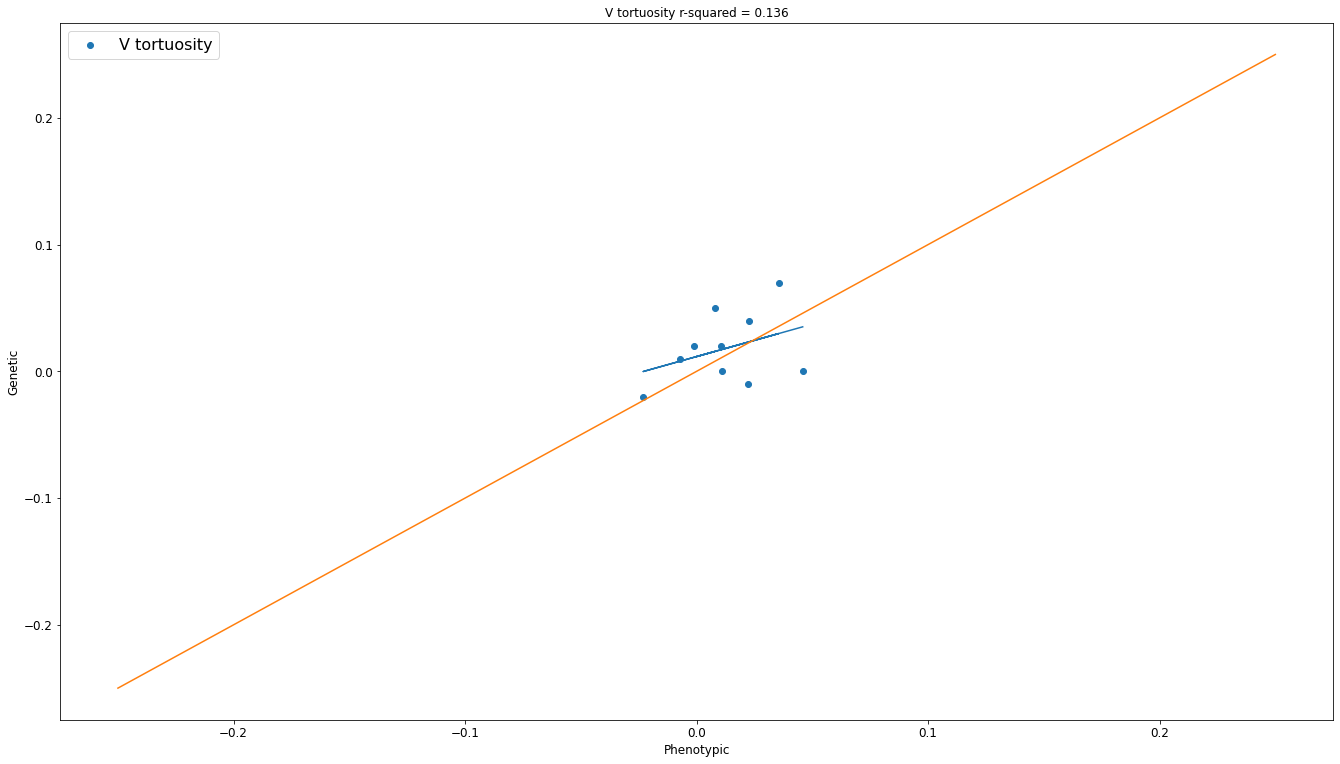

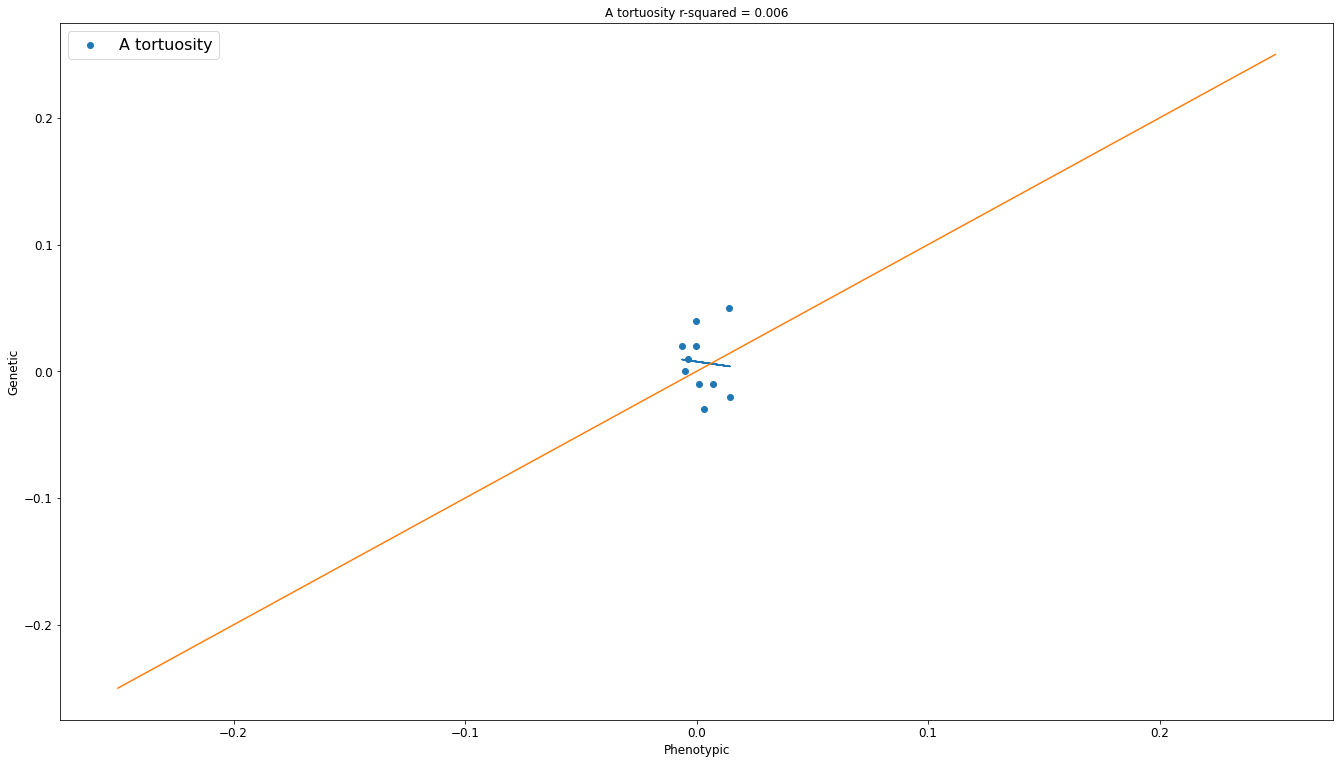

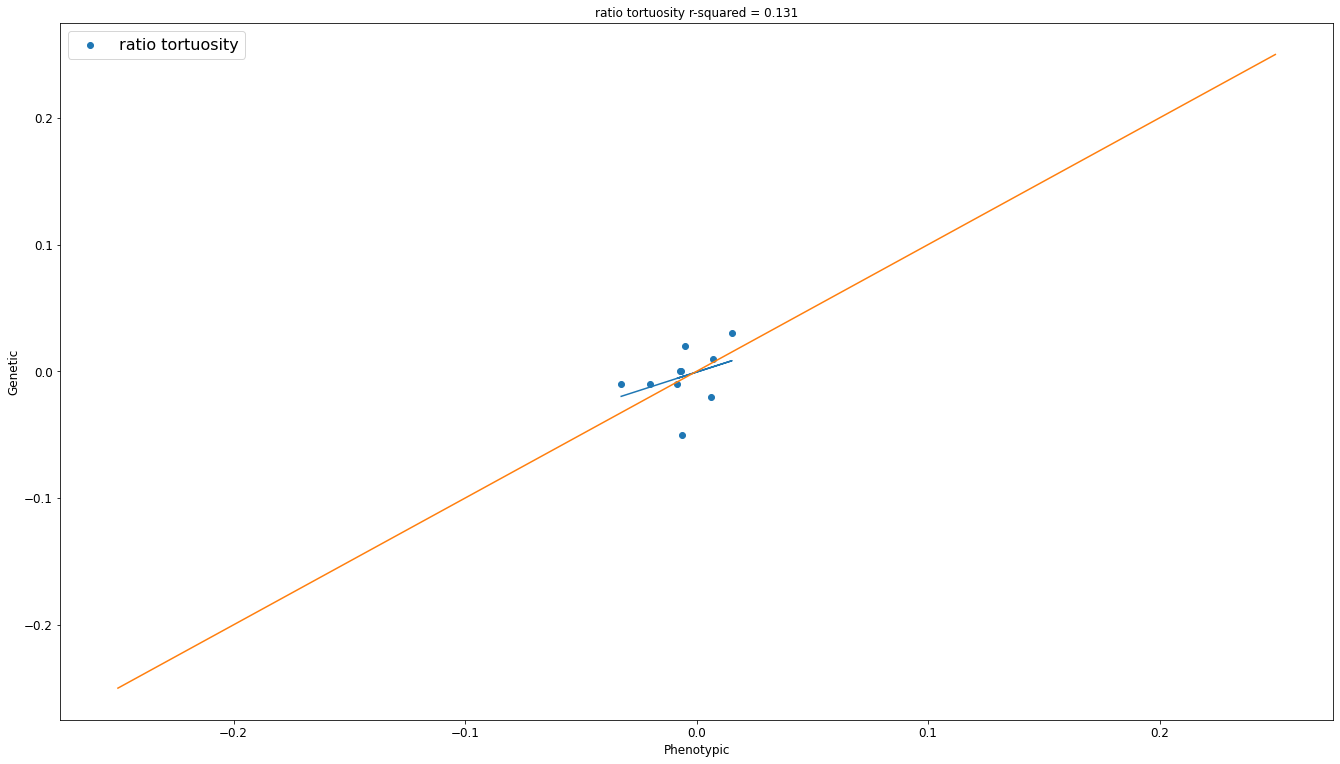

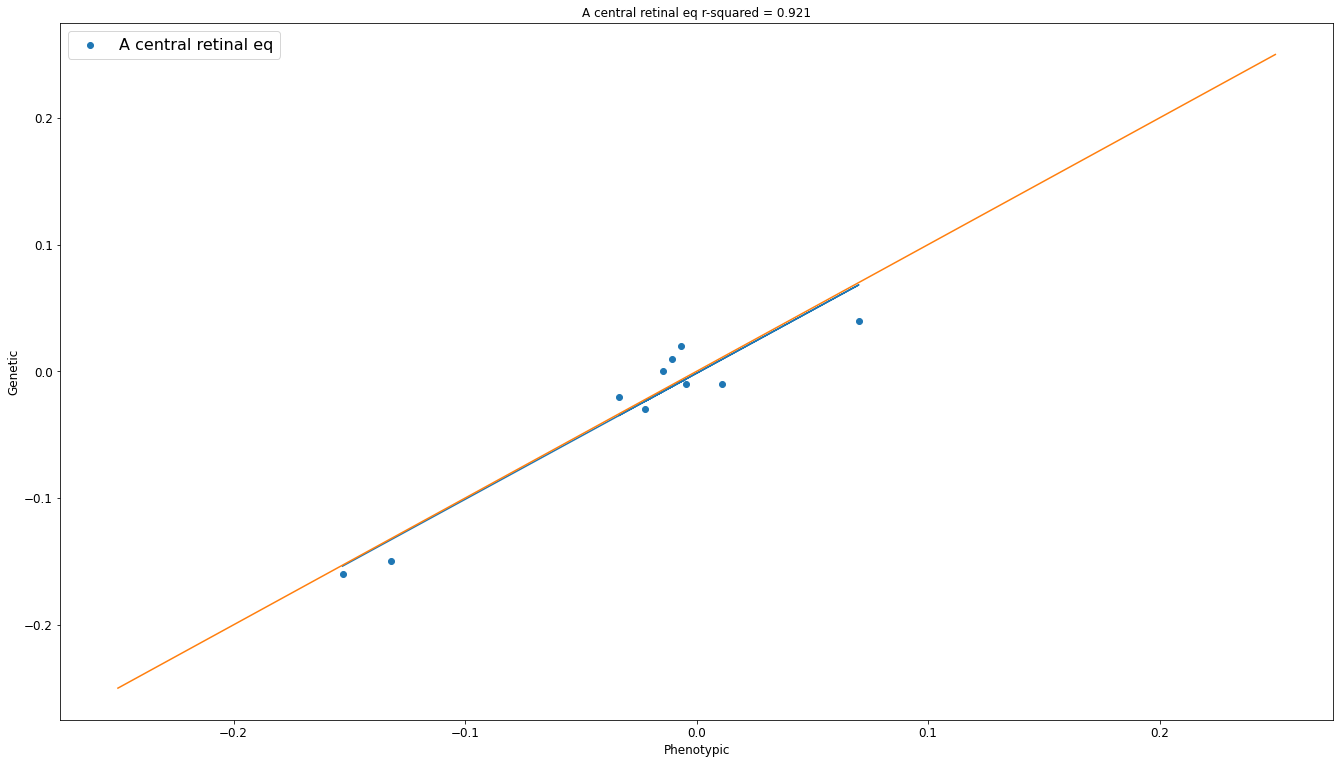

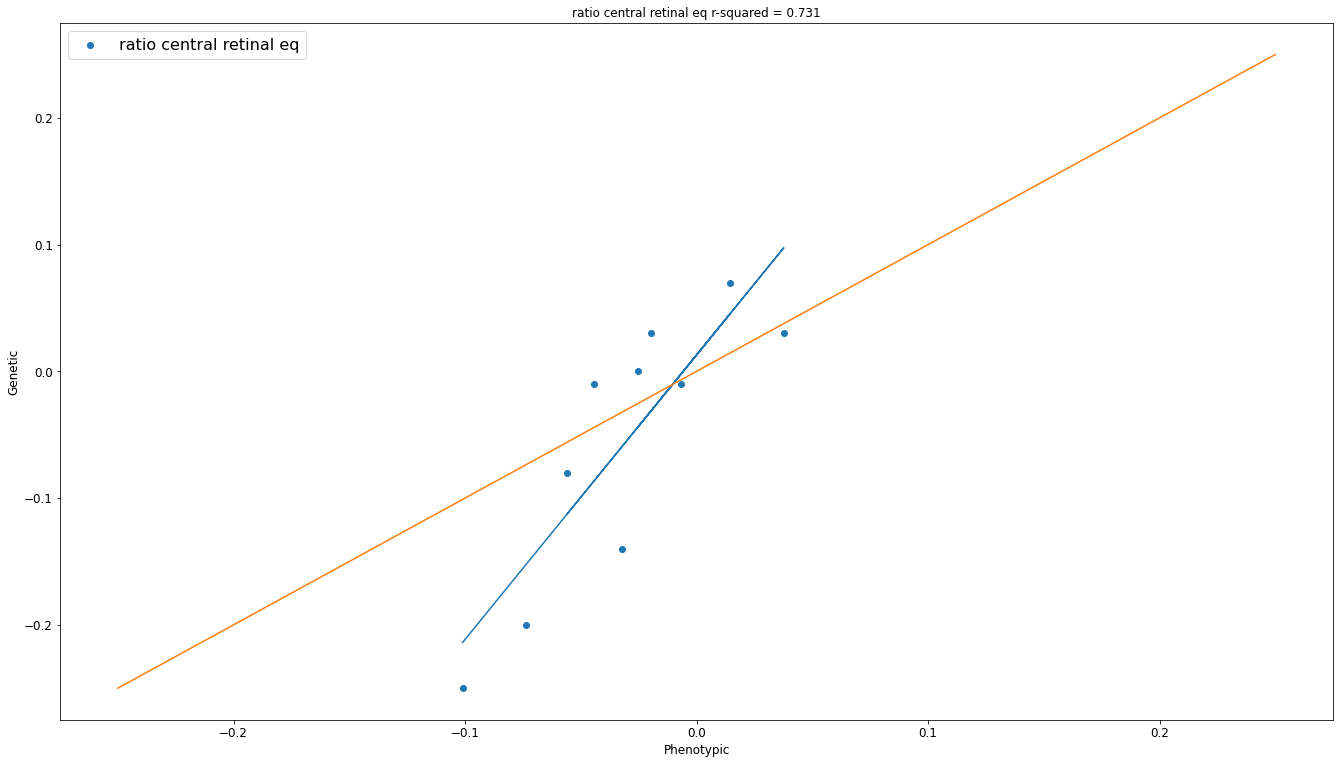

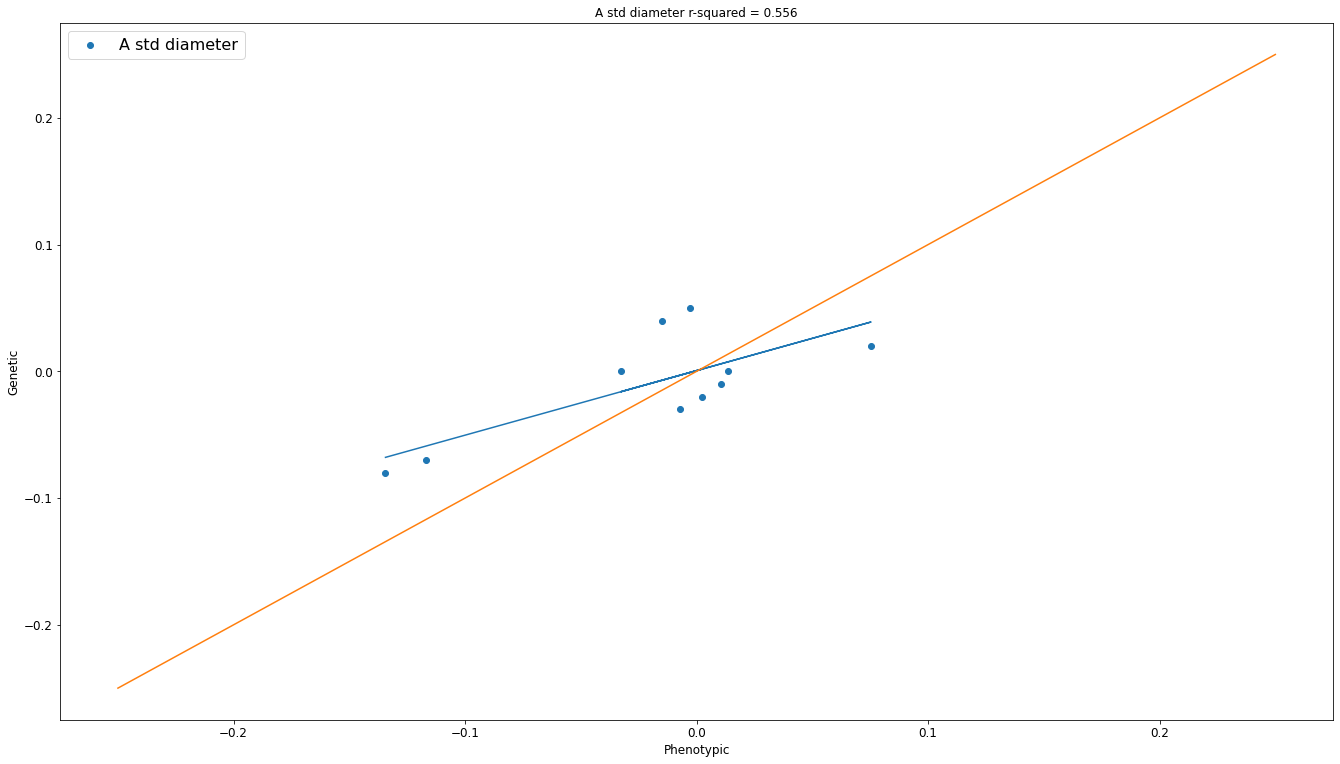

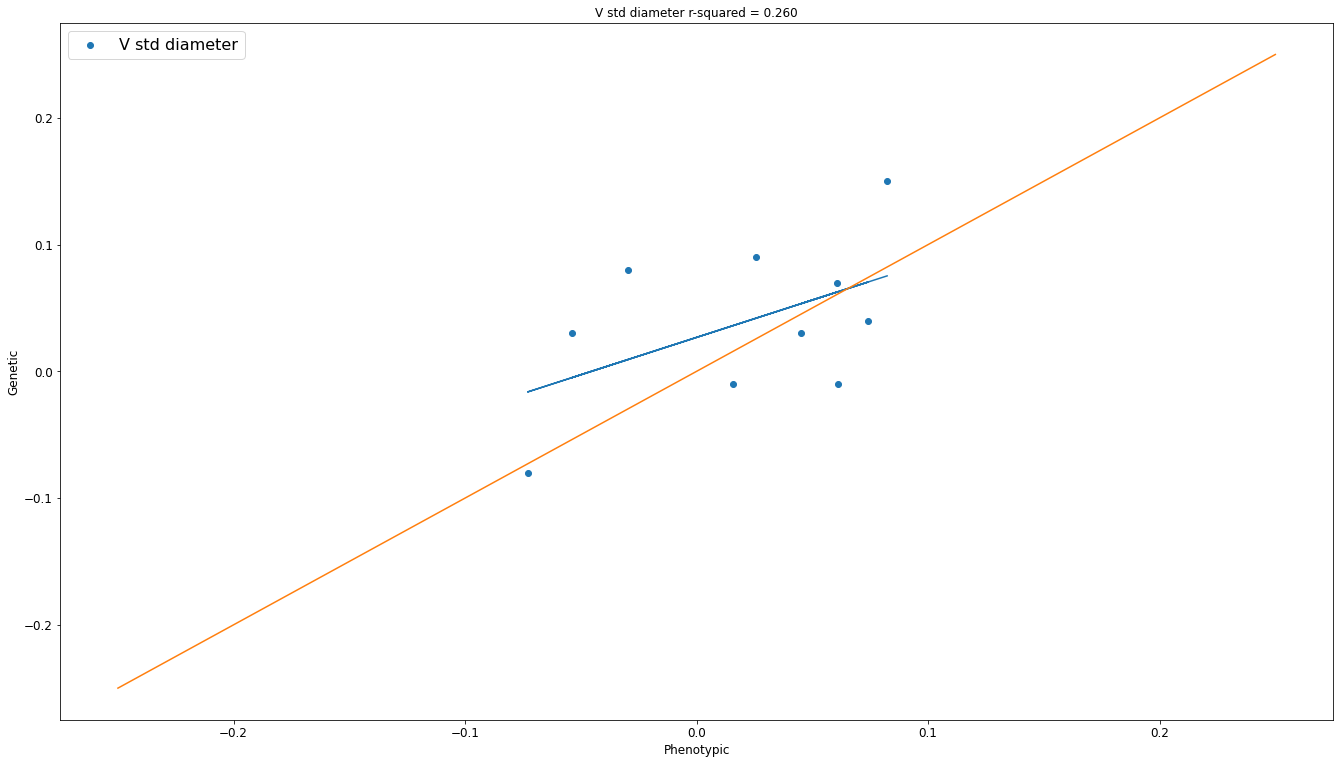

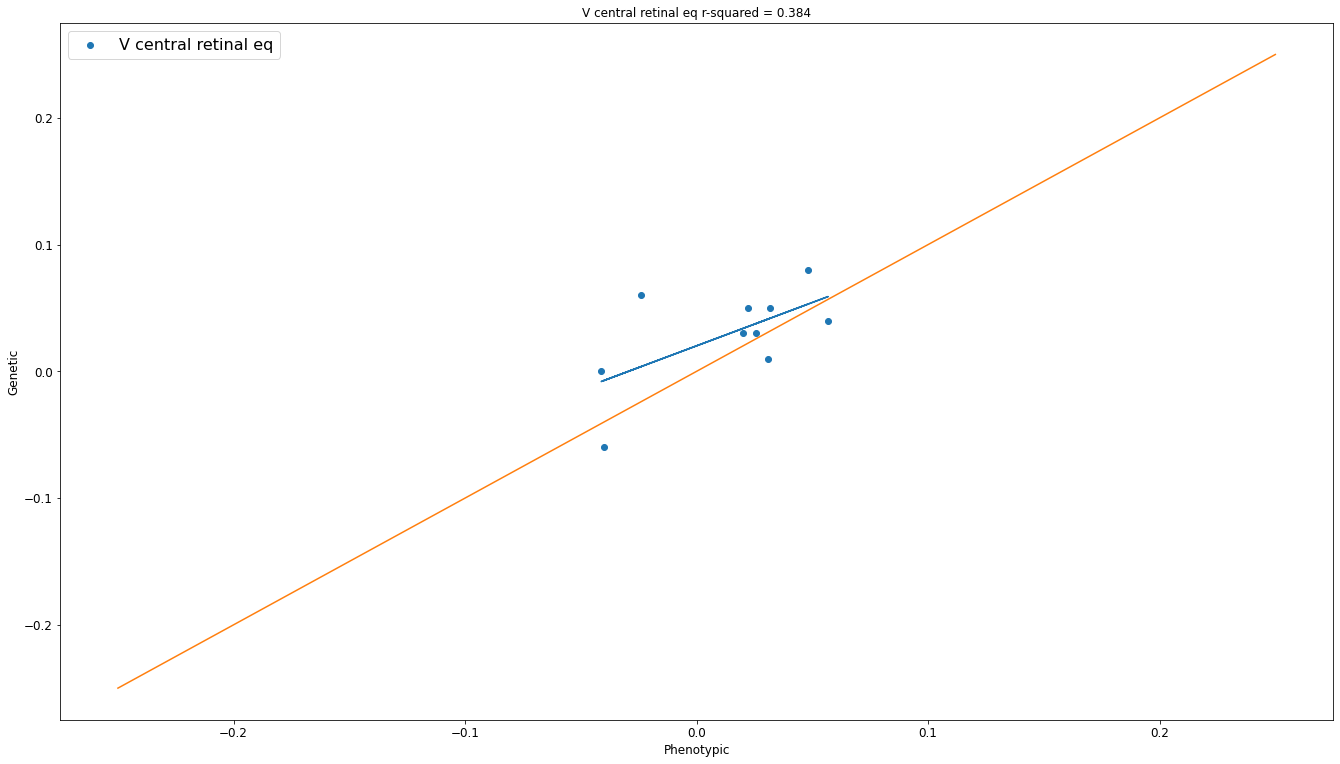

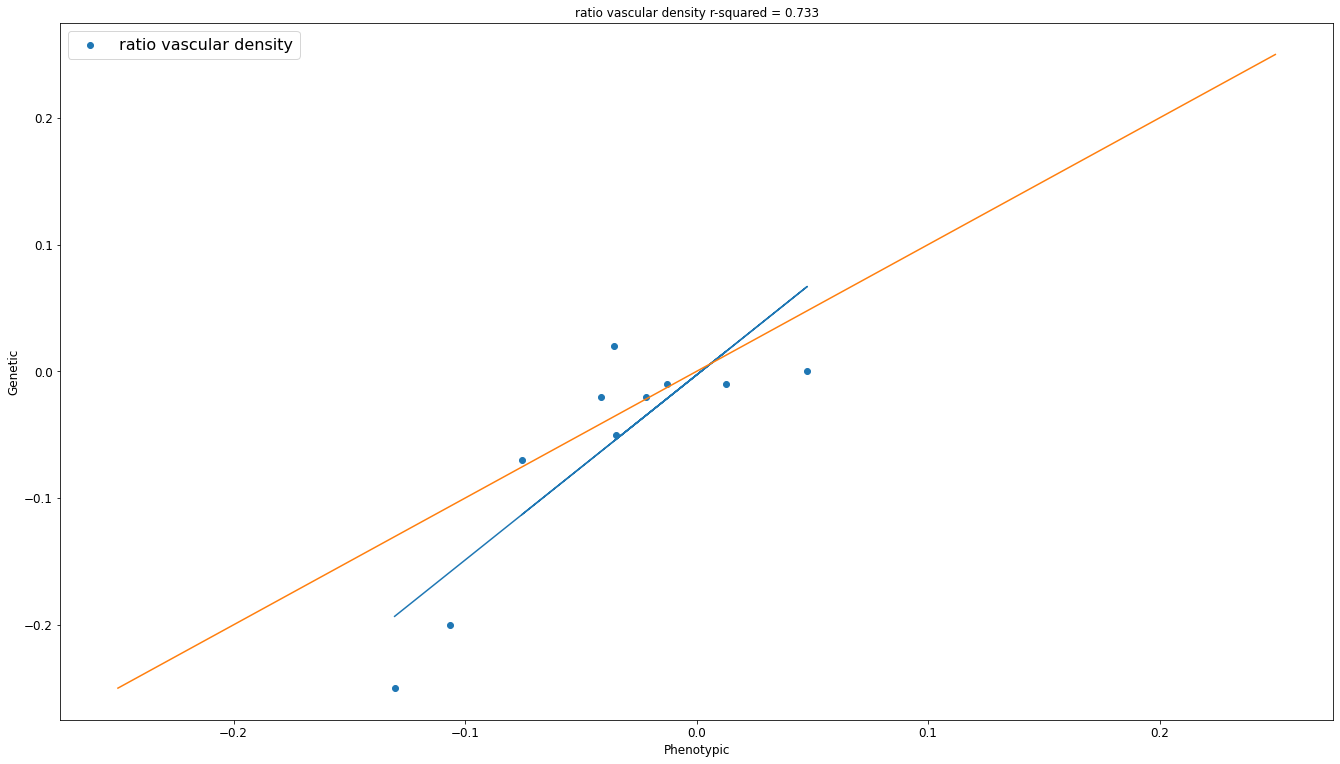

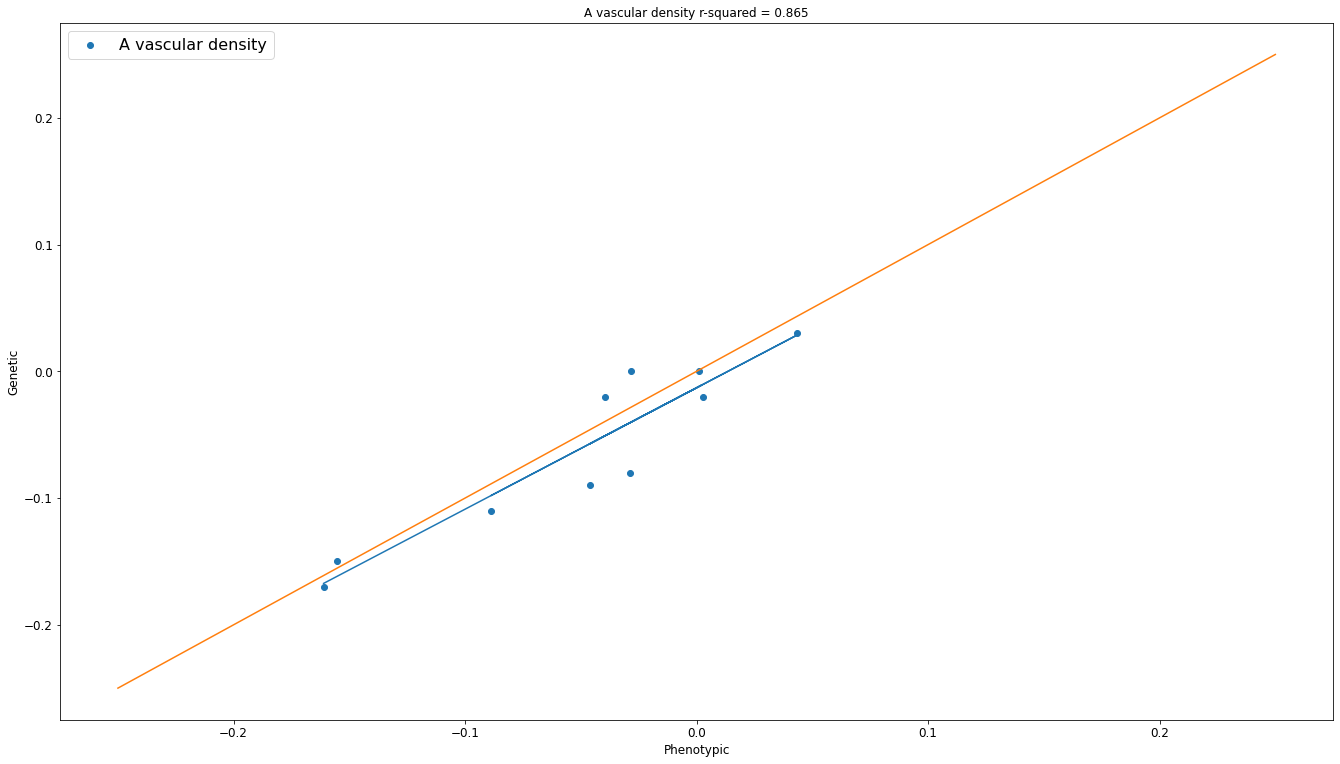

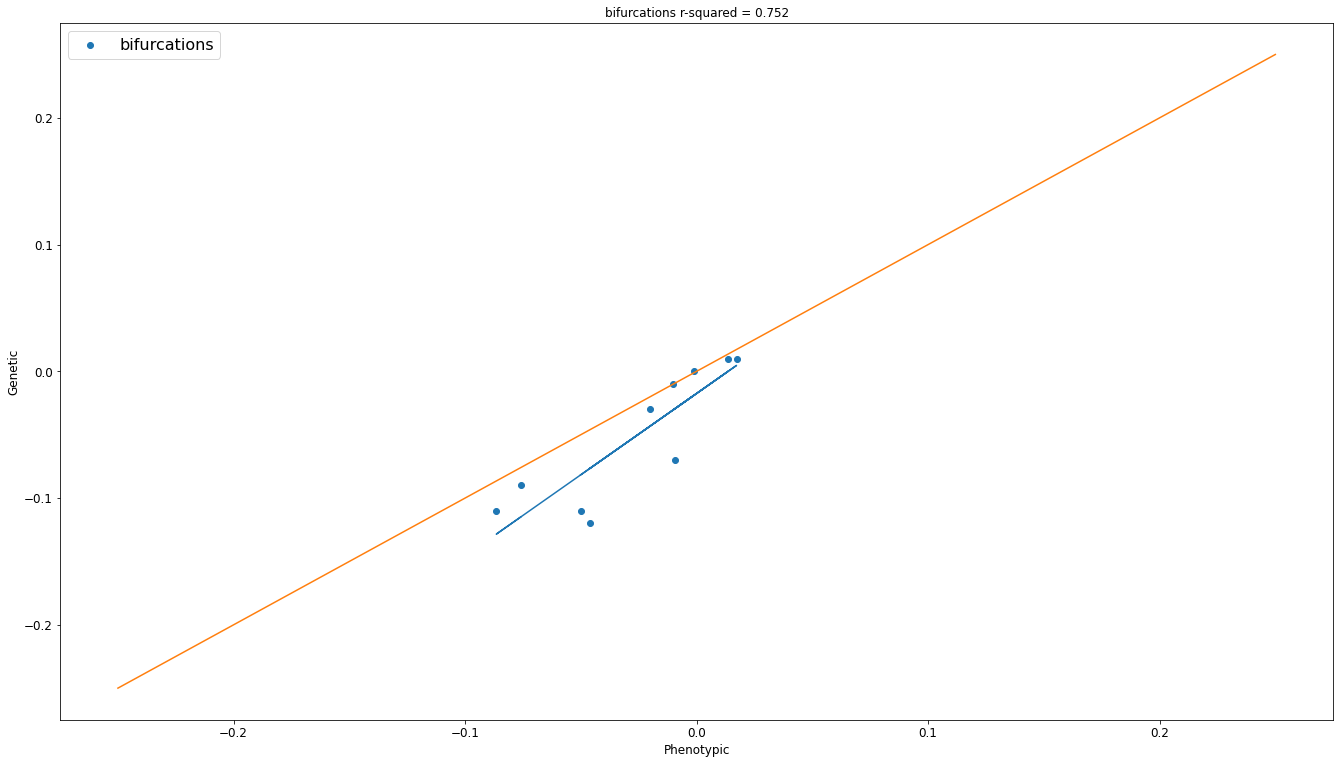

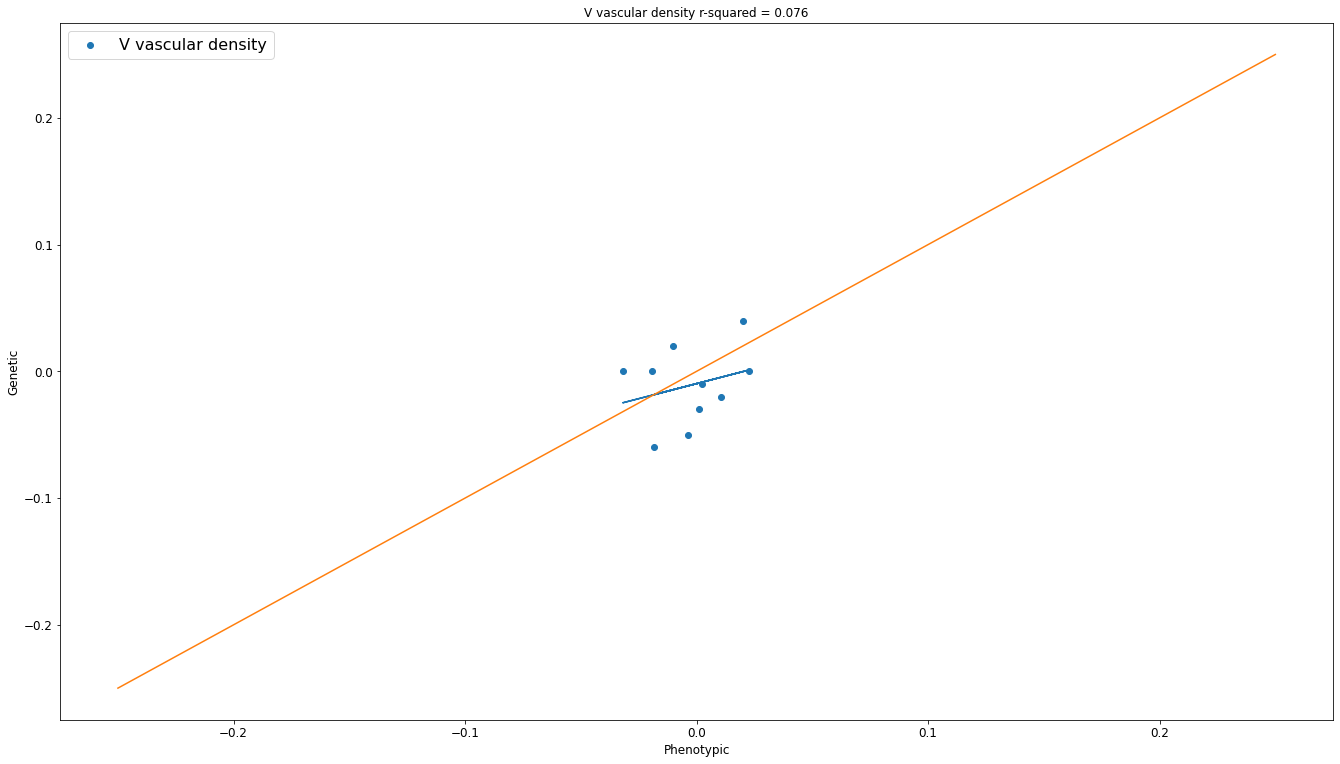

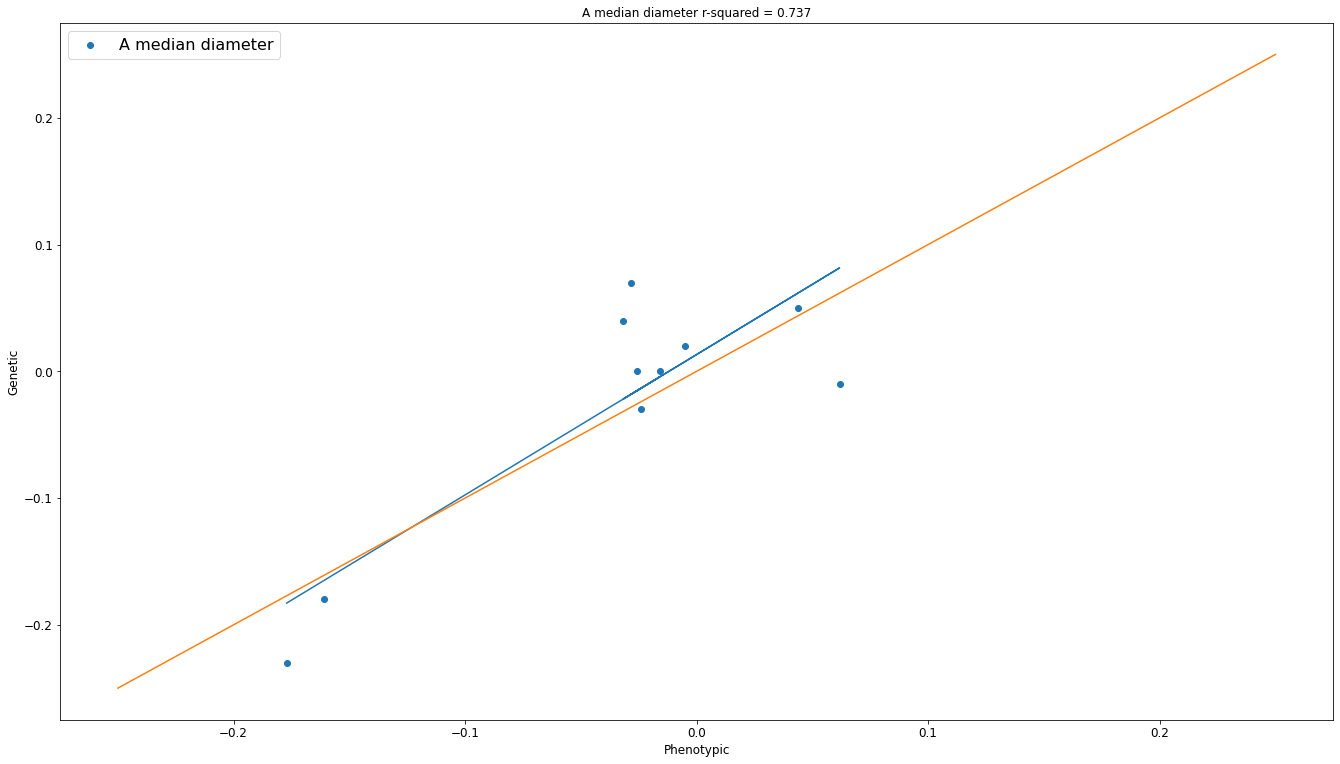

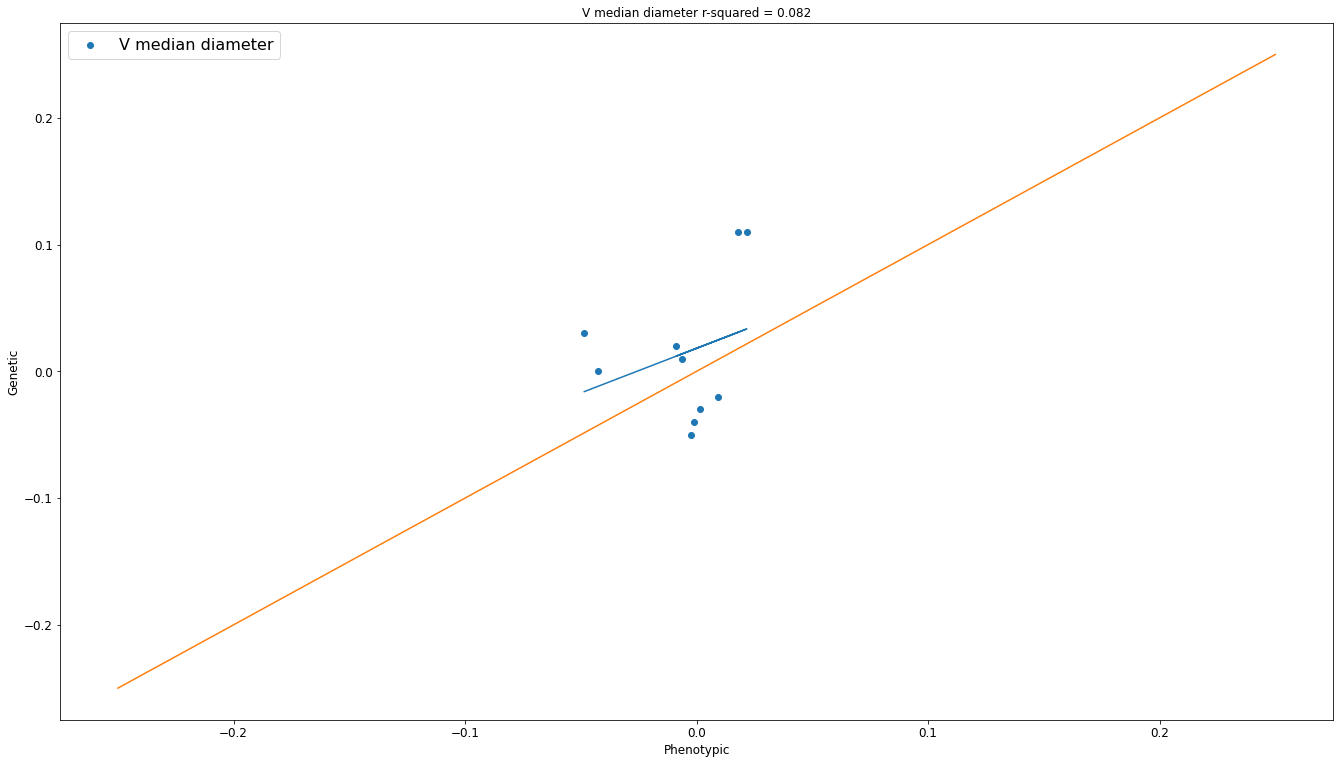

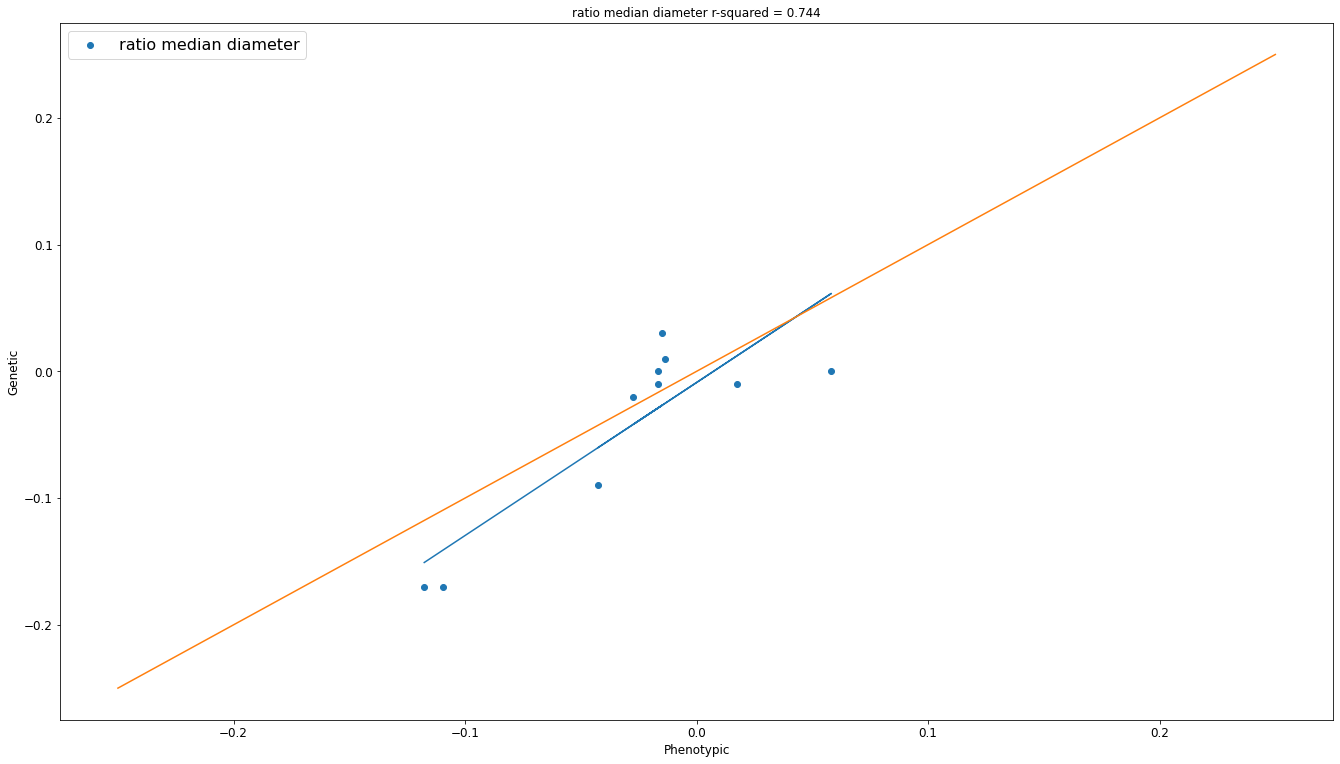

In [67]:
def phen_gen_scatter_one_at_the_time_diag_tend(df_1, df_2):
    l_aux = []
    for col in df_1.columns:
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.scatter(x=df_1[col], y=df_2[col], label=col)  #, c=df_2.index, cmap="Set3")
        z = np.polyfit(np.array(df_1[col]), np.array(df_2[col]), 1)
        p = np.poly1d(z)
        #add trendline to plot
        plt.plot(np.array(df_1[col]), p(np.array(df_1[col])))
        ident = [-0.25, 0.25]
        plt.plot(ident,ident)
        r_value, r_value2 = rsquared(df_1[col], df_2[col])
        plt.legend(loc='best', fontsize=16)
        #print( col , r_value2)
        plt.xlabel('Phenotypic')
        plt.ylabel('Genetic')
        plt.title(col + " r-squared = {:.3f}".format(r_value2))
        plt.show()

        data={
            'col':  col,
            'r_value':  r_value,
            'r_value2':  r_value2
            }
        l_aux.append(data)
        
    return pd.DataFrame(l_aux)


df_continuos_R = phen_gen_scatter_one_at_the_time_diag_tend(betas_intersection, df_corr_minus_std_intersection)

df_T_continuos_R =phen_gen_scatter_one_at_the_time_diag_tend(betas_intersection.T, df_corr_minus_std_intersection.T)


# Not intersection traits ('manual biyection')

In [28]:
print('ATENTION! -> Phenoty and genetically we have different sizes, we do not have biyective function between them. So it is needed to make decisions')
print('len(df_corr_minus_std) and len(betas): ', len(df_corr_minus_std), len(betas))
#print(df_corr_minus_std.index, betas.index)
list_pheno_not_geno = list(set(betas.index) - set(list_intersection_phe_gen))
list_geno_not_pheno = list(set(df_corr_minus_std.index) - set(list_intersection_phe_gen))
print('Pheno not Geno ', len(list_pheno_not_geno), ' -> names: ', list_pheno_not_geno)
print('Geno not Pheno ', len(list_geno_not_pheno), ' -> names: ', list_geno_not_pheno)


#df_corr_minus_std_geno_not_pheno = df_corr_minus_std.T[list_geno_not_pheno]
#df_corr_minus_std_geno_not_pheno.columns()

#plt.scatter(x= betas.T['Cataract'], y=df_corr_minus_std.T['Cataract *'])

ATENTION! -> Phenoty and genetically we have different sizes, we do not have biyective function between them. So it is needed to make decisions
len(df_corr_minus_std) and len(betas):  17 32
Pheno not Geno  17  -> names:  ["Alzheimer's disease", 'DVT', 'Glaucoma', 'Amblyopia', 'Hypermetropia', 'Presbyopia', 'Astigmatism', 'PE', 'Atherosclerosis', 'Diabetes-eye', 'N_cigarettes_curr_daily_both', 'Stroke', 'Smoking', 'Myopia', 'Mortality', 'Other ED', 'date_disorders_arteries_arterioles']
Geno not Pheno  2  -> names:  ['Smoking status: Never', 'Smoking status: Current']


In [29]:
def binary_phen_gen_scatter_one_at_the_time_diag_tend(df_1, df_2, list_pheno_diseases, list_gen_diseases):
    counter = 0
    l_aux = []
    for col in list_pheno_diseases:
        col2 = list_gen_diseases[counter]
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.scatter(x=df_1[col], y=df_2[col2], label=col)  #, c=df_2.index, cmap="Set3")
        z = np.polyfit(np.array(df_1[col]), np.array(df_2[col2]), 1)
        p = np.poly1d(z)
        #add trendline to plot
        plt.plot(np.array(df_1[col]), p(np.array(df_1[col])))
        ident = [-0.25, 0.25]
        plt.plot(ident,ident)
        r_value, r_value2 = rsquared(df_1[col], df_2[col2])
        plt.legend(loc='best', fontsize=16)
        #print( col , r_value2)
        plt.xlabel('Phenotypic')
        plt.ylabel('Genetic')
        plt.title(f'{col} {col2}' + " r-squared = {:.3f}".format(r_value2))
        plt.show()
        counter= counter + 1

        data={
            'col':  col,
            'r_value':  r_value,
            'r_value2':  r_value2
            }
        l_aux.append(data)

    return pd.DataFrame(l_aux)


def binary_phen_gen_scatter_diag_tend(df_1, df_2, list_pheno_diseases, list_gen_diseases):
    counter = 0
    for col in list_pheno_diseases:
        col2 = list_gen_diseases[counter]
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.scatter(x=df_1[col], y=df_2[col2], label=col)  #, c=df_2.index, cmap="Set3")
        plt.legend(loc='best', fontsize=16)
        z = np.polyfit(np.array(df_1[col]), np.array(df_2[col2]), 1)
        p = np.poly1d(z)
        #add trendline to plot
        plt.plot(np.array(df_1[col]), p(np.array(df_1[col])))
        counter= counter + 1
    ident = [-0.3, 0.3]
    plt.plot(ident,ident)
    plt.xlabel('Phenotypic')
    plt.ylabel('Genetic')
    plt.title('Binary traits')
    plt.show()


list_pheno_diseases = ['Myopia', 'Hypermetropia', 'Cataract', 'High blood pressure', 'Angina', 'Diabetes', 'Stroke', 'Heart attack', 'Pack smoked per year']
#list_gen_diseases = ['Myopia', 'Glasses hypermetropia *', 'Cataract *', 'High blood pressure *', 'Angina *', 'Diabetes *','Stroke *', 'Heart attack *', 'Smoking status: current *']

#list_gen_diseases = ['Glasses myopia *', 'Glasses hypermetropia *', 'Cataract *', 'High blood pressure *', 'Angina *', 'Diabetes *','Stroke *', 'Heart attack *', 'Smoking status: current *']

#phen_gen_scatter_one_at_the_time_diag_tend(betas_intersection, df_corr_minus_std_intersection, list_pheno_diseases, list_gen_diseases)

binary_phen_gen_scatter_diag_tend(betas.T, df_geno_used_binary, list_pheno_diseases, list_gen_diseases )
df_binary_R= binary_phen_gen_scatter_one_at_the_time_diag_tend(betas.T, df_geno_used_binary, list_pheno_diseases)


NameError: name 'list_gen_diseases' is not defined

In [ ]:
#df_continuos_R.plot.bar(y='r_value', x='col')
#df_continuos_R.plot.bar(y='r_value2', x='col')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
df_continuos_R.plot.bar(y='r_value', x='col', ax=ax1)
plt.xticks(rotation=45, ha='right')
df_binary_R.plot.bar(y='r_value', x='col',ax=ax2)
plt.xticks(rotation=45, ha='right')
plt.title('r value (between phenotypic/genetic corr) for continues and binary traits')
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
df_continuos_R.plot.bar(y='r_value2', x='col', ax=ax1)
plt.xticks(rotation=45, ha='right')
df_binary_R.plot.bar(y='r_value2', x='col',ax=ax2)
plt.xticks(rotation=45, ha='right')
plt.title('r2 value (between phenotypic/genetic corr) for continues and binary traits')
plt.show()


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
df_continuos_R.plot.bar(y='r_value', x='col', ax=ax1)
xlabels1 = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels1, rotation=45,  ha='right')
df_continuos_R.plot.bar(y='r_value2', x='col', ax=ax2)
xlabels2 = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels2, rotation=45,  ha='right')
#plt.title('r and r2 value (between phenotypic/genetic corr) for continues traits')
plt.show()